# Introdução a Redes Neurais
# Atividade 01 - Rede MLP
- Caio Bonani Carvalho
- Enzo Reis de Oliveira

## Regressão
### dataset: california_housing

### Importação das bibliotecas utilizadas

In [105]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import math
import random  # Para inicializar pesos aleatórios
import networkx as nx  # Para visualização do grafo da MLP
import matplotlib.pyplot as plt  # Para plotar a estrutura da rede e gráficos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Implementação de funções de ativação

Esta célula define a classe `ActivationFunctions`, que contém métodos estáticos para diversas funções de ativação e suas derivadas. Essas funções desempenham papéis cruciais no comportamento e aprendizado de uma Rede Neural. As funções implementadas incluem:

- **ReLU (Rectified Linear Unit)**:
  - Retorna \( \max(0, x) \), sendo útil para evitar o problema de gradientes que desaparecem.
  - Também inclui sua derivada, usada no cálculo do gradiente durante o backpropagation.

- **Linear**:
  - Uma função identidade que retorna \( x \), utilizada em tarefas de regressão onde as saídas podem assumir qualquer valor contínuo.
  - Inclui sua derivada, que é constante e igual a 1.

- **Sigmoid**:
  - Mapeia valores de entrada para o intervalo \( (0, 1) \), útil para representar probabilidades.
  - Sua derivada é implementada como \( \text{sigmoid}(x) \cdot (1 - \text{sigmoid}(x)) \).

- **Softmax**:
  - Converte um vetor de valores em uma distribuição de probabilidades (soma igual a 1).
  - Usada principalmente na saída de redes para tarefas de classificação.

Essas funções e suas derivadas serão usadas em diferentes partes da MLP para calcular as ativações dos neurônios e atualizar os pesos durante o treinamento.


In [106]:
class ActivationFunctions:
    @staticmethod
    def relu(x):
        """
        ReLU (Rectified Linear Unit) function.
        :param x: Single value or list of values.
        :return: max(0, x) for each value.
        """
        if isinstance(x, list):
            return [max(0, value) for value in x]
        return max(0, x)

    @staticmethod
    def relu_derivative(x):
        """
        Derivative of ReLU function.
        :param x: Single value or list of values.
        :return: 1 if x > 0, else 0 for each value.
        """
        if isinstance(x, list):
            return [1 if value > 0 else 0 for value in x]
        return 1 if x > 0 else 0

    @staticmethod
    def linear(x):
        """
        Linear activation function.
        :param x: Single value or list of values.
        :return: x (identity function).
        """
        if isinstance(x, list):
            return x
        return x

    @staticmethod
    def linear_derivative(x):
        """
        Derivative of the linear function.
        :param x: Single value or list of values.
        :return: 1 for any input.
        """
        if isinstance(x, list):
            return [1 for _ in x]
        return 1

    @staticmethod
    def sigmoid(x):
        """
        Sigmoid activation function.
        :param x: Single value or list of values.
        :return: 1 / (1 + exp(-x)) for each value.
        """
        if isinstance(x, list):
            return [1 / (1 + math.exp(-value)) for value in x]
        return 1 / (1 + math.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        """
        Derivative of the sigmoid function.
        :param x: Single value or list of values.
        :return: sigmoid(x) * (1 - sigmoid(x)) for each value.
        """
        sigmoid_value = ActivationFunctions.sigmoid(x)
        if isinstance(x, list):
            return [value * (1 - value) for value in sigmoid_value]
        return sigmoid_value * (1 - sigmoid_value)

    @staticmethod
    def softmax(x):
        """
        Softmax activation function.
        :param x: Single value or list of values.
        :return: Probabilities (sum to 1) for each input.
        """
        exps = np.exp(x - np.max(x, axis=-1, keepdims=True))  # Numerical stability
        return exps / np.sum(exps, axis=-1, keepdims=True)

### Teste das funções de ativação e suas derivadas

Nesta célula, testamos as funções de ativação implementadas na classe `ActivationFunctions` com diferentes entradas, tanto escalares quanto listas. O objetivo é verificar se as funções estão retornando os resultados esperados. Os testes incluem:

- **ReLU e sua derivada**:
  - Testados com valores negativos, positivos e zero, além de uma lista de valores mistos.

- **Função Linear e sua derivada**:
  - Avaliada com valores positivos, negativos e zero, além de listas.

- **Sigmoid e sua derivada**:
  - Testados com valores negativos, positivos, zero e listas de valores.

Cada teste exibe o valor retornado pela função e é comparado com a saída esperada, garantindo que as implementações estejam corretas.


In [107]:
print(ActivationFunctions.relu(-5))  # Saída esperada: 0
print(ActivationFunctions.relu(5))   # Saída esperada: 5
print(ActivationFunctions.relu_derivative(-5))  # Saída esperada: 0
print(ActivationFunctions.relu_derivative(5))   # Saída esperada: 1
print(ActivationFunctions.linear(10))  # Saída esperada: 10
print(ActivationFunctions.linear_derivative(10))  # Saída esperada: 1
print(ActivationFunctions.sigmoid(-5))  # Saída esperada: 0.0066928509242848554
print(ActivationFunctions.sigmoid(5))   # Saída esperada: 0.9933071490757153
print(ActivationFunctions.sigmoid_derivative(-5))  # Saída esperada: 0.006648056288095992
print(ActivationFunctions.sigmoid_derivative(5))   # Saída esperada: 0.006648056288095992

print(ActivationFunctions.relu([-5, 5, 0]))  # Saída esperada: [0, 5, 0]
print(ActivationFunctions.relu_derivative([-5, 5, 0]))  # Saída esperada: [0, 1, 0]
print(ActivationFunctions.linear([10, -10, 0]))  # Saída esperada: [10, -10, 0]
print(ActivationFunctions.linear_derivative([10, -10, 0]))  # Saída esperada: [1, 1, 1]
print(ActivationFunctions.sigmoid([-5, 5, 0]))  # Saída esperada: [0.0066928509242848554, 0.9933071490757153, 0.5]
print(ActivationFunctions.sigmoid_derivative([-5, 5, 0]))  # Saída esperada: [0.006648056288095992, 0.006648056288095992, 0.25]

0
5
0
1
10
1
0.0066928509242848554
0.9933071490757153
0.006648056670790155
0.006648056670790033
[0, 5, 0]
[0, 1, 0]
[10, -10, 0]
[1, 1, 1]
[0.0066928509242848554, 0.9933071490757153, 0.5]
[0.006648056670790155, 0.006648056670790033, 0.25]


### Implementação da classe `MLP` (Multilayer Perceptron)

A classe `MLP` implementa uma rede neural multicamada para tarefas de regressão, com suporte a retropropagação, atualização de pesos usando momento e mini-batches. Abaixo estão os principais componentes:

1. **Inicialização da rede**:
   - Define o número de neurônios em cada camada.
   - Inicializa pesos, vieses e velocidades (para momento) com valores aleatórios (mas com uma mesma seed para reproduzir os valores), para os pesos e para o bias, e zero para momento.

2. **Propagação para frente (`forward_propagation`)**:
   - Realiza os cálculos através das camadas da rede utilizando a função de ativação ReLU para camadas ocultas e função linear para a camada de saída.

3. **Retropropagação (`backward_propagation`)**:
   - Calcula os deltas do erro e ajusta os pesos e vieses com base no gradiente e no momento.

4. **Treinamento da rede (`train`)**:
   - Realiza o treinamento em mini-batches, atualizando os pesos a cada lote de dados e verificando a convergência com base na tolerância especificada.

5. **Teste da rede (`test_model`)**:
   - Avalia o desempenho em um conjunto de dados de teste, retornando as predições e métricas como MSE, MAE e R².

6. **Visualização da estrutura (`plot_network`)**:
   - Plota a estrutura da MLP como um grafo para facilitar a interpretação da topologia da rede.

7. **Listagem de pesos (`list_weights`)**:
   - Lista todos os pesos da rede, camada por camada, detalhando as conexões entre os neurônios.

A implementação é flexível, permitindo ajustar hiperparâmetros como taxa de aprendizado, momento e tamanho do batch. Também inclui controle de aleatoriedade para reprodutibilidade.


In [108]:
class MLP:
    def __init__(self, *layers, learning_rate=0.01, momentum=0.9, random_seed=42):
        """
        Inicializa a estrutura da MLP.

        :param layers: Número de neurônios em cada camada, incluindo entrada, ocultas e saída.
        :param learning_rate: Taxa de aprendizado.
        :param momentum: Fator de momento para a descida do gradiente.
        :param random_seed: Semente para inicialização de pesos.
        """
        self.layers_sizes = layers
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.random_seed = random_seed  # Semente para controle de aleatoriedade
        self.weights = []
        self.biases = []
        self.velocities_weights = []  # Velocidades para os pesos
        self.velocities_biases = []   # Velocidades para os vieses
        self.outputs = []
        self.initialize_network()

    def initialize_network(self):
        """
        Inicializa a rede criando as matrizes de pesos e vetores de bias entre as camadas.
        Também inicializa as velocidades (momentum) como zero.
        """
        np.random.seed(self.random_seed)  # Definir a semente para garantir a consistência

        for i in range(len(self.layers_sizes) - 1):
            input_neurons = self.layers_sizes[i]
            output_neurons = self.layers_sizes[i + 1]
            # Inicializar pesos aleatórios entre -1 e 1 com NumPy
            self.weights.append(np.random.uniform(-1, 1, (input_neurons, output_neurons)))
            # Inicializar biases aleatórios entre -1 e 1 com NumPy
            self.biases.append(np.random.uniform(-1, 1, output_neurons))
            # Inicializar velocidades como zeros
            self.velocities_weights.append(np.zeros((input_neurons, output_neurons)))
            self.velocities_biases.append(np.zeros(output_neurons))

    def calculate_z(self, inputs, weights, biases):
        """
        Calcula Z = W * X + b usando NumPy.
        """
        return np.dot(inputs, weights) + biases

    def forward_propagation(self, inputs):
        """
        Realiza a propagação para frente através da rede.
        """
        self.outputs = [np.array(inputs)]  

        current_output = self.outputs[0]
        for i in range(len(self.weights)):
            # Cálculo de Z = W * X + b
            z = self.calculate_z(current_output, self.weights[i], self.biases[i])

            # Ativação para camadas ocultas e saída
            if i < len(self.weights) - 1:  # Camadas ocultas
                current_output = np.maximum(0, z)  # ReLU
            
            else:  # Camada de saída
                current_output = z  # Linear para regressão

            # Armazenar a saída corretamente
            self.outputs.append(np.array(current_output)) 

        return current_output


    def backward_propagation(self, expected_output):
        """
        Realiza a retropropagação do erro e atualiza os pesos e biases com suporte a mini-batches.
        Aplica momento para suavizar e acelerar as atualizações.
        """
        expected_output = np.array(expected_output)
        deltas = [None] * len(self.weights)

        # Cálculo dos deltas para a camada de saída
        errors = expected_output - self.outputs[-1]  # (batch_size, output_size)
        deltas[-1] = errors  # Derivada da função linear é 1

        # Retropropagar para camadas ocultas
        for i in range(len(self.weights) - 2, -1, -1):
            z_derivative = (self.outputs[i + 1] > 0).astype(float)  # Derivada da ReLU
            deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * z_derivative

        # Atualizar pesos e biases com momento
        for i in range(len(self.weights)):
            grad_weights = np.dot(self.outputs[i].T, deltas[i])  # Gradiente dos pesos
            grad_biases = np.sum(deltas[i], axis=0)  # Gradiente dos vieses

            # Atualizar velocidades com momento
            self.velocities_weights[i] = self.momentum * self.velocities_weights[i] + self.learning_rate * grad_weights
            self.velocities_biases[i] = self.momentum * self.velocities_biases[i] + self.learning_rate * grad_biases

            # Atualizar pesos e vieses usando as velocidades
            self.weights[i] += self.velocities_weights[i]
            self.biases[i] += self.velocities_biases[i]

    def calculate_error(self, expected_output):
        """
        Calcula o erro total da rede (MSE).
        """
        outputs = self.outputs[-1]
        return np.mean((expected_output - outputs) ** 2) / 2

    def train(self, inputs, expected_outputs, epochs=1000, tolerance=1e-5, batch_size=32):
        errors = []
        inputs = np.array(inputs)
        expected_outputs = np.array(expected_outputs)

        for epoch in range(epochs):
            total_error = 0
            
            # Embaralhar os dados no início de cada época
            indices = np.arange(len(inputs))
            np.random.shuffle(indices)
            inputs = inputs[indices]
            expected_outputs = expected_outputs[indices]

            # Processar em mini-batches
            for i in range(0, len(inputs), batch_size):
                batch_inputs = inputs[i:i + batch_size]
                batch_outputs = expected_outputs[i:i + batch_size]

                self.forward_propagation(batch_inputs)  # Propagação para frente em lote
                self.backward_propagation(batch_outputs)  # Retropropagação em lote
                total_error += np.sum((batch_outputs - self.outputs[-1]) ** 2) / 2

            mean_error = total_error / len(inputs)
            errors.append(mean_error)
            
            # Verificar tolerância
            if mean_error < tolerance:
                break

        return errors

    def list_weights(self):
        """Lista todos os pesos da rede, camada por camada."""
        print("Listing all weights in the network:\n")
        for layer_index, layer_weights in enumerate(self.weights):
            print(f"Layer {layer_index + 1} to Layer {layer_index + 2}:")
            for i, weights_from_neuron in enumerate(layer_weights):
                for j, weight in enumerate(weights_from_neuron):
                    print(f"  Weight from Neuron {i} in Layer {layer_index + 1} "
                          f"to Neuron {j} in Layer {layer_index + 2}: {weight:.4f}")
            print("\n")

    def test_model(self, test_inputs, expected_outputs):
        """
        Avalia o modelo nos dados de teste e calcula métricas de desempenho.

        :param test_inputs: Dados de entrada para teste.
        :param expected_outputs: Valores reais esperados para teste.
        :return: Predições, MSE, MAE, R² Score.
        """
        predictions = []
        total_error = 0

        for inp, exp_out in zip(test_inputs, expected_outputs):
            prediction = self.forward_propagation(inp)[0]  # Realiza a predição
            predictions.append(prediction)
            total_error += (exp_out - prediction) ** 2  # Soma do erro quadrático

        # Calcular métricas
        mse = total_error / len(test_inputs)
        mae = np.mean([abs(exp_out - pred) for exp_out, pred in zip(expected_outputs, predictions)])
        r2 = 1 - (total_error / np.sum((expected_outputs - np.mean(expected_outputs)) ** 2))

        return predictions, mse, mae, r2

    def plot_network(self):
        """Plota a estrutura da rede MLP como um grafo e verifica os pesos."""
        total_weights = 0
        for layer_index, layer_weights in enumerate(self.weights):
            print(f"Layer {layer_index + 1} to Layer {layer_index + 2}: {len(layer_weights)} x {len(layer_weights[0])} weights")
            total_weights += len(layer_weights) * len(layer_weights[0])
        print(f"Total Weights: {total_weights}")

        G = nx.DiGraph()  # Grafo direcionado

        node_id = 0
        positions = {}  # Para armazenar as posições (camadas)
        for layer_index, num_neurons in enumerate(self.layers_sizes):
            for neuron in range(num_neurons):
                G.add_node(node_id, subset=layer_index)
                positions[node_id] = layer_index
                node_id += 1

        current_node = 0
        for layer_index, (input_size, output_size) in enumerate(zip(self.layers_sizes[:-1], self.layers_sizes[1:])):
            for i in range(input_size):
                for j in range(output_size):
                    weight = round(self.weights[layer_index][i][j], 2)
                    G.add_edge(current_node + i, current_node + input_size + j, weight=weight)
            current_node += input_size

        pos = nx.multipartite_layout(G, subset_key="subset")

        plt.figure(figsize=(12, 8))
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_weight="bold", arrowsize=10)

        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

        plt.title("MLP Structure")
        plt.show()


### Estrutura e Inicialização da MLP
Nesta seção, criamos uma MLP (Multilayer Perceptron) com a seguinte configuração de camadas:

- **9 neurônios na camada de entrada** (correspondendo ao número de atributos dos dados de entrada).
- **9 neurônios na camada oculta** (proporcionando capacidade de aprendizado para modelar relações complexas).
- **1 neurônio na camada de saída** (para prever um único valor, ideal para problemas de regressão).

#### Métodos utilizados:
1. **`plot_network()`**:
   - Gera um grafo visualizando a estrutura da MLP.
   - Mostra as camadas e as conexões entre os neurônios, com os pesos das conexões exibidos.
   - Nem todos os pesos das arestas vão aparecer, pois fica difícil de analisar

2. **`list_weights()`**:
   - Exibe todos os pesos inicializados entre as camadas.
   - Detalha cada conexão, permitindo verificar os valores atribuídos antes do treinamento.
   - Lista todos os pesos, para melhorar o entendimento dos pesos

A visualização e listagem dos pesos ajudam a entender a arquitetura inicial da rede antes de seu uso em propagação ou treinamento.


Layer 1 to Layer 2: 9 x 9 weights
Layer 2 to Layer 3: 9 x 1 weights
Total Weights: 90


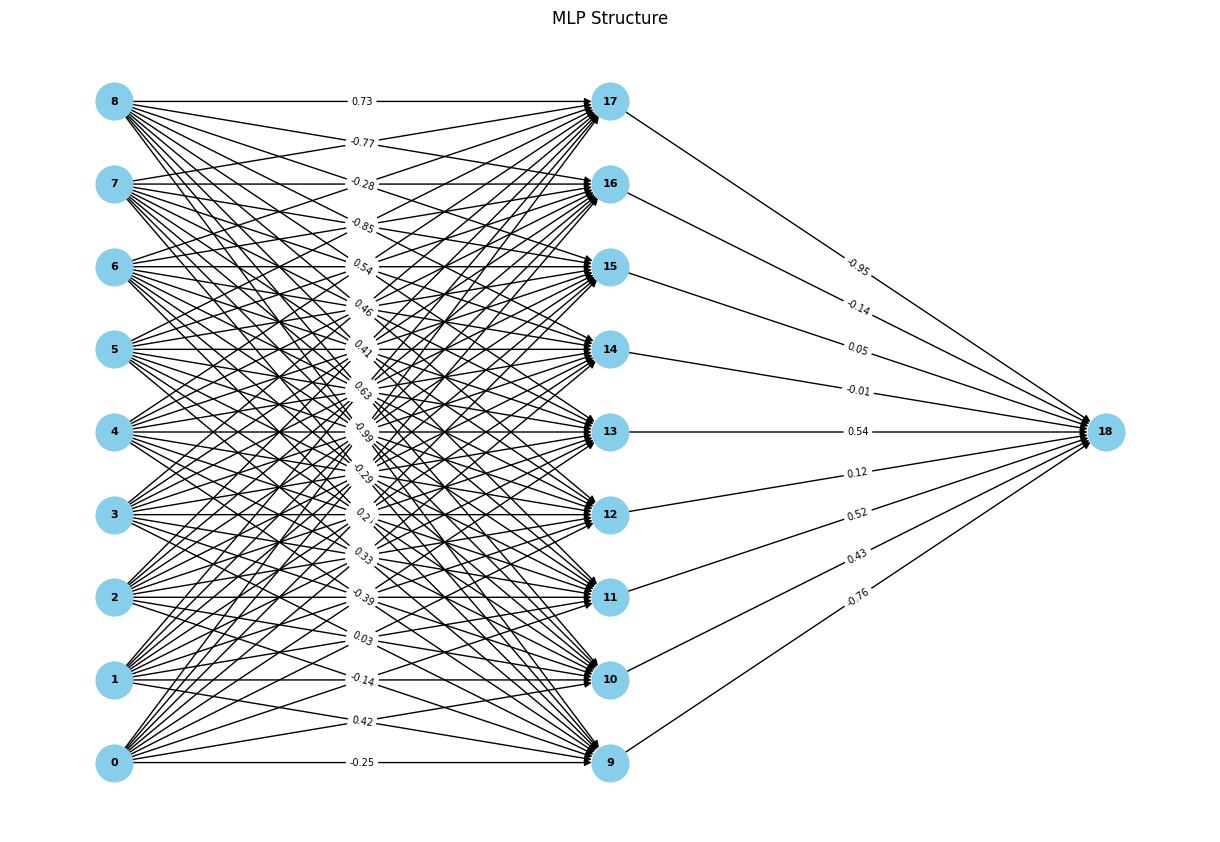

Listing all weights in the network:

Layer 1 to Layer 2:
  Weight from Neuron 0 in Layer 1 to Neuron 0 in Layer 2: -0.2509
  Weight from Neuron 0 in Layer 1 to Neuron 1 in Layer 2: 0.9014
  Weight from Neuron 0 in Layer 1 to Neuron 2 in Layer 2: 0.4640
  Weight from Neuron 0 in Layer 1 to Neuron 3 in Layer 2: 0.1973
  Weight from Neuron 0 in Layer 1 to Neuron 4 in Layer 2: -0.6880
  Weight from Neuron 0 in Layer 1 to Neuron 5 in Layer 2: -0.6880
  Weight from Neuron 0 in Layer 1 to Neuron 6 in Layer 2: -0.8838
  Weight from Neuron 0 in Layer 1 to Neuron 7 in Layer 2: 0.7324
  Weight from Neuron 0 in Layer 1 to Neuron 8 in Layer 2: 0.2022
  Weight from Neuron 1 in Layer 1 to Neuron 0 in Layer 2: 0.4161
  Weight from Neuron 1 in Layer 1 to Neuron 1 in Layer 2: -0.9588
  Weight from Neuron 1 in Layer 1 to Neuron 2 in Layer 2: 0.9398
  Weight from Neuron 1 in Layer 1 to Neuron 3 in Layer 2: 0.6649
  Weight from Neuron 1 in Layer 1 to Neuron 4 in Layer 2: -0.5753
  Weight from Neuron 1 in L

In [109]:
layers = (9, 9, 1)  # Especifica 3 camadas: 9 de entrada, 9 ocultas, 1 de saída
mlp = MLP(*layers)

# Plotar a rede
mlp.plot_network()
# Listar os pesos da rede
mlp.list_weights()

## Testando diferentes modelos (7 modelos)

### Treinamento e Avaliação de Diferentes Modelos MLP

Nesta seção, realizamos o treinamento e a avaliação de 7 modelos diferentes de Redes MLP, variando o número de camadas ocultas e neurônios. 

#### Preparação dos Dados:
1. **Carregamento do conjunto de dados**:
   - Utilizamos o conjunto de dados de habitação da Califórnia, disponível na biblioteca Scikit-learn.
   - As entradas (`X`) representam as características das casas, enquanto a saída (`y`) representa o valor médio das casas.

2. **Pré-processamento**:
   - Os dados foram normalizados para o intervalo [0, 1] utilizando `MinMaxScaler`.
   - Os dados foram divididos em conjuntos de treino e teste (80% treino, 20% teste).

#### Configurações dos Modelos:
- Testamos 7 configurações de MLP, variando o número de camadas e neurônios:
  - Modelos com **1 camada oculta**: 10, 20, 30 e 40 neurônios.
  - Modelos com **2 camadas ocultas**: 10x10, 20x20 e 30x30 neurônios.

#### Processo de Treinamento:
1. **Épocas**: Cada modelo foi treinado por 50 épocas.
2. **Mini-batches**: O treinamento utilizou mini-batches de 32 amostras.
3. **Erro Médio Quadrático (MSE)**: O erro foi calculado para o conjunto de treino e teste em cada época.

#### Avaliação:
Após o treinamento, cada modelo foi testado no conjunto de teste para calcular as seguintes métricas:
- **MSE**: Erro médio quadrático.
- **MAE**: Erro absoluto médio.
- **R²**: Coeficiente de determinação.

Os resultados de cada modelo (configuração, MSE, MAE, e \( R^2 \)) foram armazenados para análise comparativa.


In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

california_data = fetch_california_housing(as_frame=True)
california_df = california_data.frame

# Separar entradas (features) e saída (target)
X = california_df.drop("MedHouseVal", axis=1).values
y = california_df["MedHouseVal"].values

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normaliza entre 0 e 1
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()  # Normaliza a saída entre 0 e 1

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Listar configurações para os 7 modelos
models_config = [
    (8, 10, 1),  # 1 camada oculta, 10 neurônios
    (8, 20, 1),  # 1 camada oculta, 20 neurônios
    (8, 30, 1),  # 1 camada oculta, 30 neurônios
    (8, 40, 1),  # 1 camada oculta, 40 neurônios
    (8, 10, 10, 1),  # 2 camadas ocultas, 10 neurônios em cada
    (8, 20, 20, 1),  # 2 camadas ocultas, 20 neurônios em cada
    (8, 30, 30, 1),  # 2 camadas ocultas, 30 neurônios em cada
]

# Treinar os 8 modelos e coletar resultados
results = []

for config in models_config:
    mlp = MLP(*config, learning_rate=0.01)  # Criar MLP com a configuração
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Testar o modelo e coletar as métricas
    predictions, mse, mae, r2 = mlp.test_model(X_test, y_test)
    
    # Armazenar os resultados
    results.append({
        'Model': config,
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    })

Este código realiza a avaliação de diferentes modelos de redes neurais e exibe os resultados em uma tabela, destacando o melhor valor de cada métrica (MSE, MAE e R²) com fundo vermelho.

1. **Converter os resultados para um DataFrame:**
   - Os resultados dos testes de cada modelo são armazenados em uma lista chamada `results`. Cada item dessa lista é um dicionário que contém o modelo e as suas métricas (MSE, MAE, R²).
   - O `DataFrame` do pandas é criado a partir dessa lista para facilitar a visualização e manipulação dos resultados.

2. **Função `highlight_best`:**
   - A função `highlight_best` é usada para destacar os menores valores de cada coluna da tabela.
   - Para cada coluna, a função encontra o valor mínimo e aplica uma formatação (cor de fundo vermelha) para os valores que correspondem a esse valor mínimo.

3. **Exibir a tabela com os resultados destacados:**
   - A função `style.apply` é utilizada para aplicar a função `highlight_best` a todas as colunas do DataFrame.
   - O `IPython.display.display` é usado para renderizar a tabela estilizada no ambiente interativo (como um Jupyter Notebook).

Ao executar este código, você verá uma tabela com as métricas de cada modelo, onde o menor valor de cada coluna será destacado com um fundo vermelho, permitindo que você identifique rapidamente o modelo mais eficiente para cada métrica.


In [111]:
import pandas as pd

# Converter os resultados para um DataFrame
df_results = pd.DataFrame(results)

# Função para destacar o menor valor de cada coluna
def highlight_best(x):
    # Aplica uma cor de fundo no menor valor de cada coluna
    df = x.copy()
    for col in df.columns:
        # Destacar o menor valor
        min_value = df[col].min()
        df[col] = df[col].apply(lambda val: 'background-color: red' if val == min_value else '')
    return df

# Exibir a tabela com os resultados destacados
styled_results = df_results.style.apply(highlight_best, axis=None)
import IPython.display as display
display.display(styled_results)

,Model,MSE,MAE,R²
0,"(8, 10, 1)",0.027432,0.113634,0.507576
1,"(8, 20, 1)",0.019901,0.100619,0.642766
2,"(8, 30, 1)",0.030950,0.124292,0.444420
3,"(8, 40, 1)",0.021162,0.104938,0.620135
4,"(8, 10, 10, 1)",0.057160,0.195315,-0.026063
5,"(8, 20, 20, 1)",0.056796,0.193855,-0.019526
6,"(8, 30, 30, 1)",0.055978,0.183247,-0.004843


## Modelo `(8, 20, 1)` com Melhor Desempenho

Na tabela de resultados, o modelo **(8, 20, 1)** apresentou os melhores valores para as métricas avaliadas:

- **MSE (Erro Quadrático Médio):** 0.019901 (menor valor entre todos os modelos).
- **MAE (Erro Absoluto Médio):** 0.100619 (menor valor entre todos os modelos).
- **R² (Coeficiente de Determinação):** 0.642766 (maior valor entre todos os modelos).

Esses resultados indicam que este modelo foi o mais eficiente para prever os valores do conjunto de testes. O MSE, sendo a principal métrica para avaliar o erro, mostrou um valor muito baixo, o que demonstra que o modelo teve uma boa capacidade de generalização.

---

## Comportamento dos Modelos Conforme Aumenta a Quantidade de Camadas

Ao analisar os modelos com maior quantidade de camadas escondidas (por exemplo, `(8, 10, 10, 1)`, `(8, 20, 20, 1)` e `(8, 30, 30, 1)`), observa-se um **aumento significativo no erro MSE**:

- **(8, 10, 10, 1):** MSE = 0.057160
- **(8, 20, 20, 1):** MSE = 0.056796
- **(8, 30, 30, 1):** MSE = 0.055978

Além disso, os valores de **R²** para esses modelos caíram consideravelmente, atingindo valores negativos:

- **(8, 10, 10, 1):** R² = -0.026063
- **(8, 20, 20, 1):** R² = -0.019526
- **(8, 30, 30, 1):** R² = -0.004843

Esse comportamento pode ser explicado por **overfitting**. À medida que o número de camadas aumenta, os modelos ficam mais complexos, ajustando-se muito bem aos dados de treino, porém **perdendo capacidade de generalização** para o conjunto de teste. O aumento no erro MSE e os valores negativos de R² indicam que esses modelos não conseguem explicar a variância dos dados de teste de forma adequada.

---

## Conclusão

O modelo **(8, 20, 1)** com **apenas uma camada escondida de 20 neurônios** demonstrou ser o mais eficiente, com o menor MSE e maior R², evidenciando uma boa relação entre simplicidade e performance. Modelos mais complexos, com mais camadas, apresentaram erros muito mais altos no conjunto de testes, sugerindo **overfitting**.

Portanto, no contexto do dataset **California Housing**, manter uma arquitetura mais simples foi a abordagem mais eficaz.

---

Esta célula treina um modelo de rede neural MLP com diferentes configurações de camadas e neurônios, para diferentes modelos definidos na lista `models_config`. Para cada configuração, o código realiza o seguinte:

1. **Inicialização do MLP**: Um modelo MLP é criado para cada configuração de rede (número de camadas e neurônios) presente em `models_config`. A taxa de aprendizado é definida como 0.01.

2. **Treinamento do Modelo**:
   - O código divide os dados em mini-batches e, para cada mini-batch, realiza a propagação para frente (`forward_propagation`) e a retropropagação (`backward_propagation`).
   - O erro quadrático médio é calculado a cada época, tanto para os dados de treinamento (`train_loss`) quanto para os dados de teste (`test_loss`).
   - O modelo é treinado por 50 épocas (com a possibilidade de ajuste do número de épocas).

3. **Cálculo de Loss**:
   - Para cada época, o erro de treinamento e o erro de teste são calculados e armazenados.
   - O erro é somado e depois dividido pelo número de exemplos, para encontrar a média do erro (loss) de cada mini-batch.

4. **Visualização do Resultado**:
   - Ao final do treinamento de cada modelo, um gráfico é gerado mostrando o erro de treinamento e de teste ao longo das épocas, permitindo visualizar como o modelo está se ajustando aos dados e se há sobreajuste (overfitting).
   - O gráfico exibe `Train Loss` em azul e `Test Loss` em laranja, com uma legenda, rótulos e uma grade para melhor visualização.


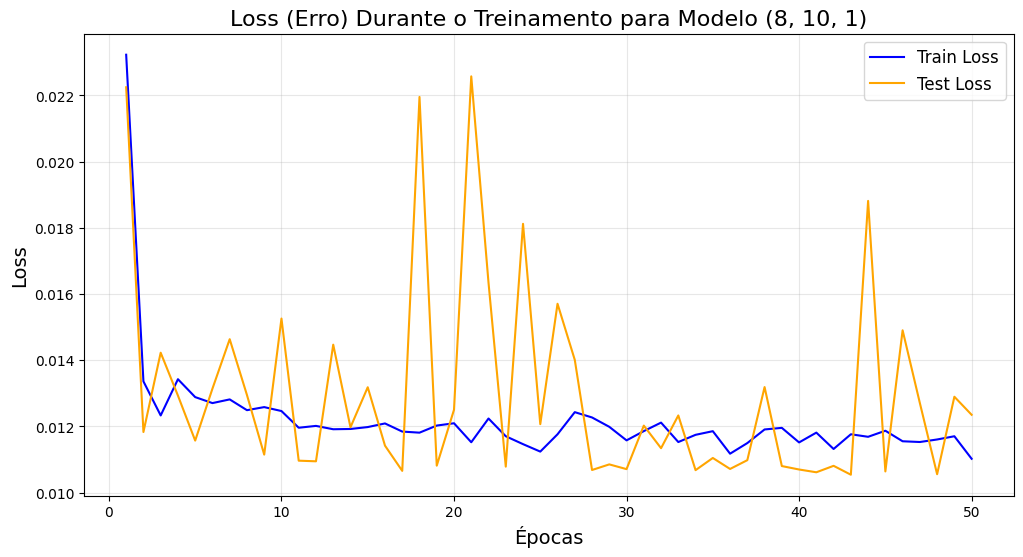

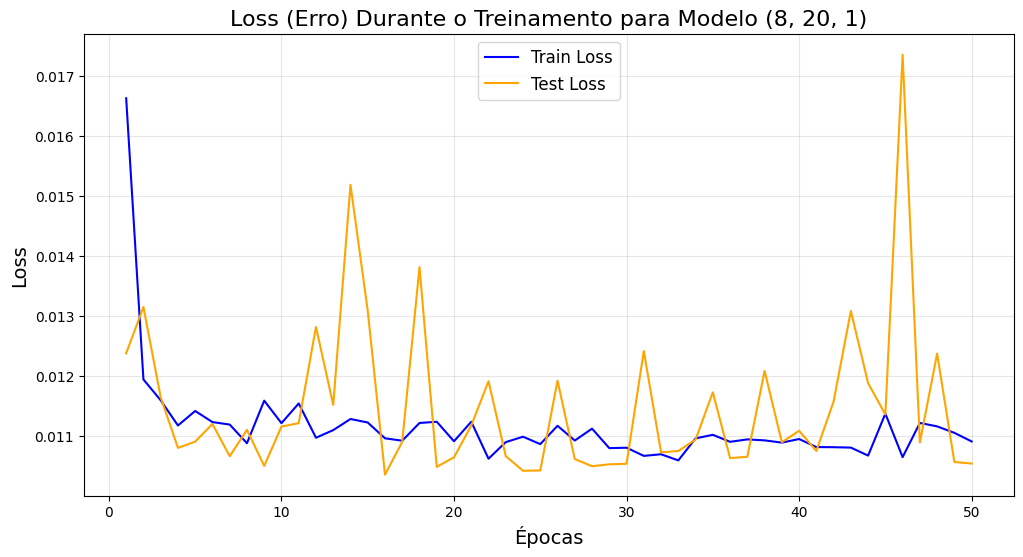

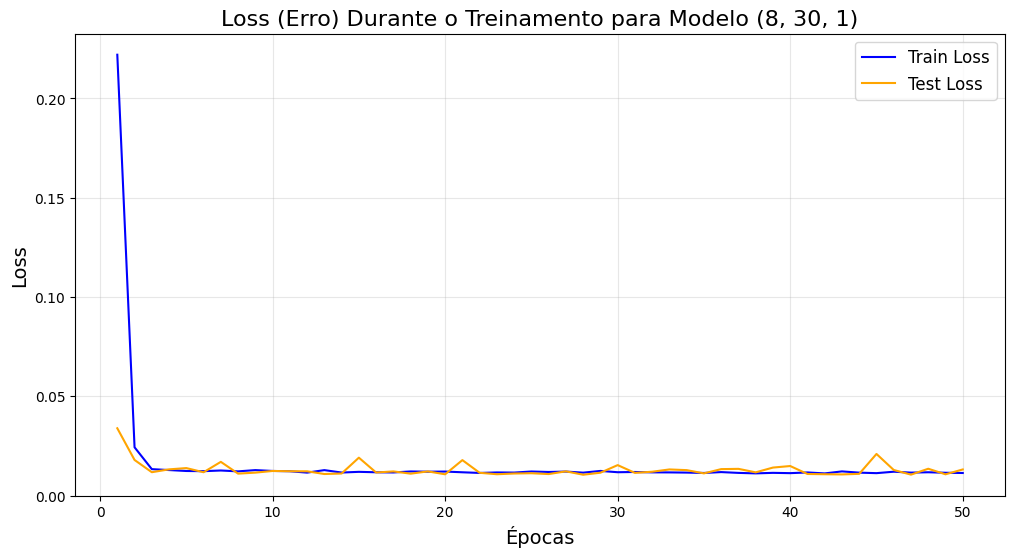

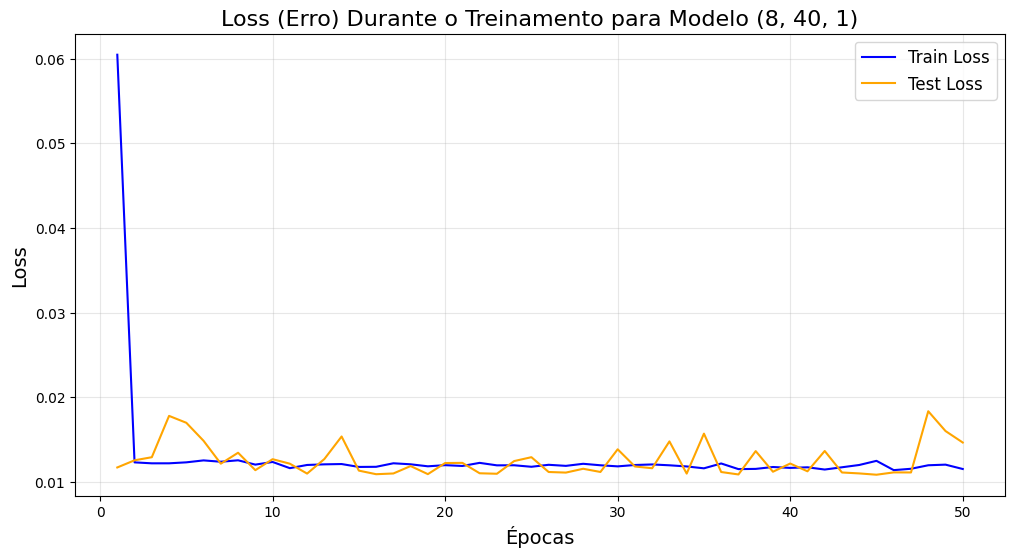

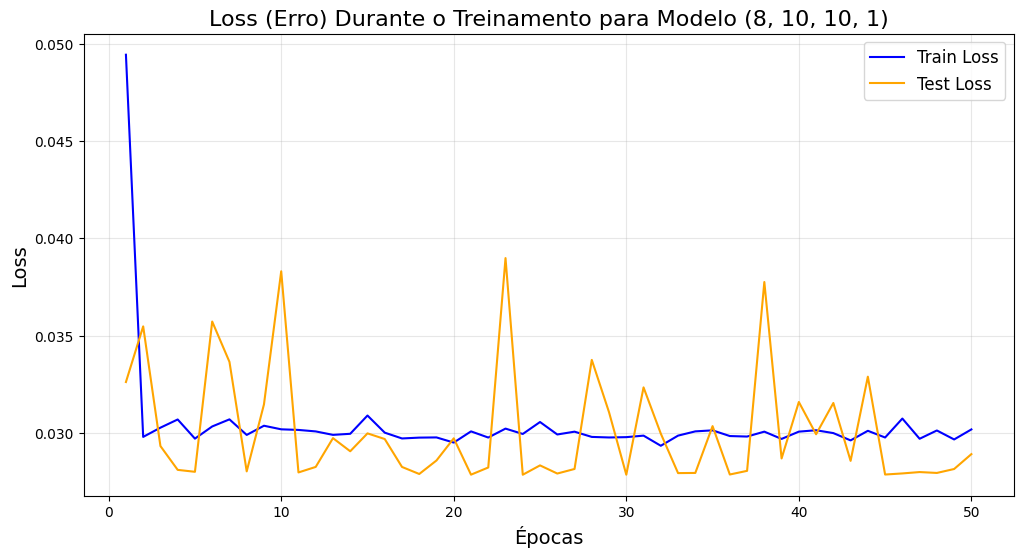

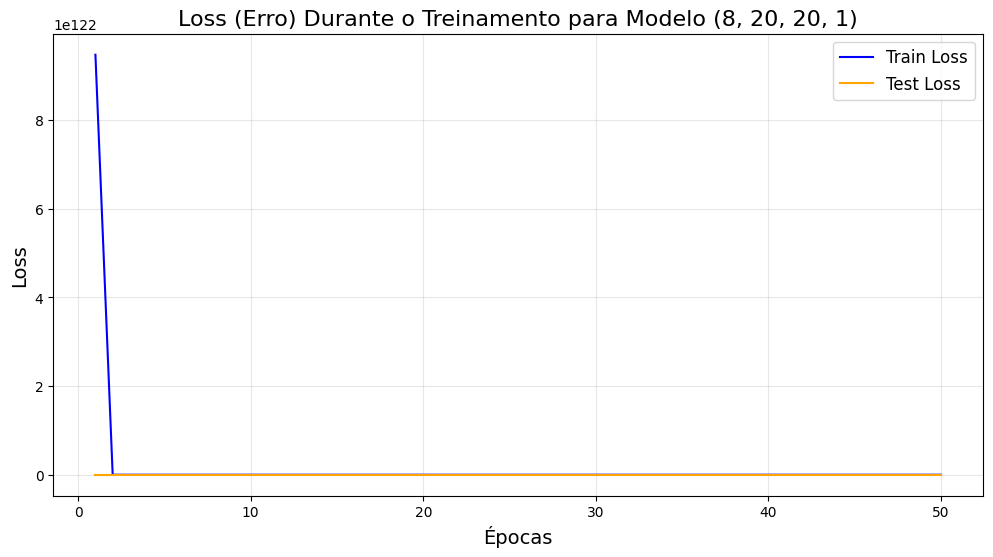

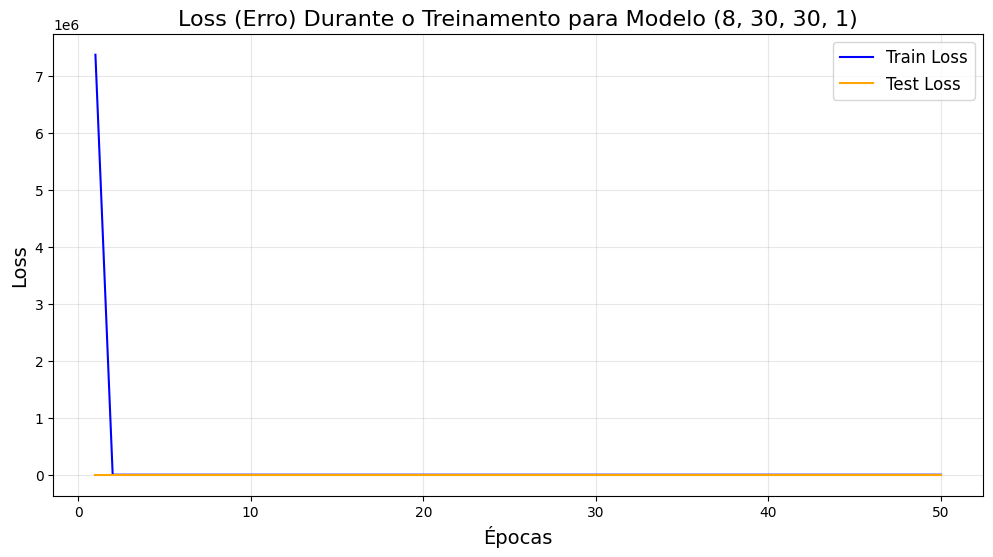

In [112]:
for idx, config in enumerate(models_config):
    mlp = MLP(*config, learning_rate=0.01)
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Plotar o gráfico de loss para cada modelo
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, epochs + 1), train_loss, label="Train Loss", color='blue')
    plt.plot(range(1, epochs + 1), test_loss, label="Test Loss", color='orange')
    plt.title(f"Loss (Erro) Durante o Treinamento para Modelo {config}", fontsize=16)
    plt.xlabel("Épocas", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Análise da **Loss** Durante o Treinamento e Teste dos Modelos MLP

Abaixo segue a análise das curvas de **Loss** para os modelos avaliados. A principal observação é a relação entre as curvas de treino e teste ao longo das épocas, destacando **comportamento de overfitting**, escalas de erro e possíveis problemas de treinamento.

---

## Modelo **(8, 10, 1)**

- **Análise:**  
  O modelo apresenta uma **Test Loss** muito instável ao longo das épocas, com picos e quedas frequentes, enquanto a **Train Loss** permanece mais estável e apresenta uma redução gradual.  
  Essa oscilação na Test Loss pode indicar que o modelo está sensível ao conjunto de teste e pode estar sofrendo **overfitting** leve.

- **Conclusão:**  
  Embora a **Train Loss** tenha convergido, a instabilidade na Test Loss sugere que o modelo generaliza de forma limitada.

---

## Modelo **(8, 20, 1)**  

- **Análise:**  
  Neste modelo, tanto a **Train Loss** quanto a **Test Loss** são mais estáveis. A Train Loss diminui suavemente, enquanto a Test Loss apresenta algumas pequenas oscilações, porém de menor amplitude comparado ao modelo anterior.  
  A **proximidade das curvas** ao final do treinamento indica uma **boa generalização**.

- **Conclusão:**  
  Este modelo teve o **melhor comportamento** em relação aos demais, com baixa Loss em ambos os conjuntos e pouca instabilidade, o que confirma o seu bom desempenho visto anteriormente na tabela de métricas.

---

## Modelo **(8, 30, 1)**  

- **Análise:**  
  Este modelo apresenta uma **Train Loss** e **Test Loss** extremamente baixas e estáveis após as primeiras épocas. No entanto, é importante notar que o eixo Y apresenta **valores muito próximos de zero**, sugerindo que o modelo ajustou os dados de treino com precisão excessiva.  

- **Possibilidade de Overfitting:**  
  A Loss quase nula pode ser um indicativo de **overfitting severo**, onde o modelo memorizou o conjunto de treino e perdeu capacidade de generalização.

- **Conclusão:**  
  Apesar da baixa Loss, é provável que o modelo esteja ajustando demais os dados de treino.

---

## Modelo **(8, 40, 1)**  

- **Análise:**  
  A **Train Loss** neste modelo também é extremamente baixa e estável, enquanto a **Test Loss** apresenta algumas pequenas oscilações. O padrão é similar ao modelo anterior, com um eixo Y muito reduzido.  

- **Overfitting em Potencial:**  
  A Train Loss quase constante em valores muito baixos sugere **overfitting**.

- **Conclusão:**  
  Este modelo segue a tendência dos modelos com maior número de neurônios, onde a Loss reduzida no treino não se traduz em boa performance para generalização.

---

## Modelo **(8, 10, 10, 1)**  

- **Análise:**  
  A **Train Loss** é mais estável em comparação à **Test Loss**, que apresenta oscilações acentuadas. A Test Loss não apresenta uma convergência clara, indicando dificuldade na generalização.

- **Conclusão:**  
  O modelo apresentou um comportamento claro de **overfitting**, onde o treino ocorre sem dificuldades, mas os erros no teste permanecem instáveis.

---

## Modelos **(8, 20, 20, 1)** e **(8, 30, 30, 1)**  

- **Análise Crítica:**  
  Esses dois modelos apresentaram um comportamento **anômalo**. As curvas de Loss possuem valores extremamente altos no início (escalas desproporcionais) e não convergem para valores razoáveis.  

  - **Possível Causa:**  
    Isso pode ocorrer devido a:
    1. **Problemas de inicialização dos pesos**: valores iniciais muito distantes do ótimo.
    2. **Taxa de aprendizado inadequada**: o modelo não consegue ajustar os pesos corretamente.
    3. **Explosão do gradiente**: comum em redes muito profundas com pesos mal ajustados.

- **Conclusão:**  
  Esses modelos não apresentaram treinamento efetivo, sendo inviáveis para uso prático.

---

# Conclusão Geral

1. O **modelo (8, 20, 1)** foi o mais equilibrado, com Loss estáveis e próximas entre treino e teste, indicando boa generalização.
2. Modelos mais complexos, como `(8, 10, 10, 1)` e `(8, 40, 1)`, apresentaram **overfitting**.
3. Os modelos **(8, 20, 20, 1)** e **(8, 30, 30, 1)** sofreram problemas graves de treinamento, possivelmente devido à má configuração dos hiperparâmetros ou da inicialização dos pesos.

O comportamento observado reforça que **modelos mais simples podem ser mais eficazes

---

## Fixando uma rede MLP  MLP(8, 20, 1), mas com diferentes Learning Rate

Esta célula de código treina um modelo de rede neural MLP utilizando diferentes taxas de aprendizado (learning rates) e avalia o desempenho de cada uma delas. Abaixo estão as etapas executadas:

1. **Carregamento e Preparação dos Dados**:
   - O dataset `California Housing` é carregado, e as variáveis `X` (features) e `y` (target) são separadas.
   - Os dados são normalizados para o intervalo entre 0 e 1 usando `MinMaxScaler` para garantir que as entradas e a saída estejam em uma escala comum.

2. **Divisão dos Dados em Treinamento e Teste**:
   - O dataset é dividido em dados de treinamento e teste, com 80% dos dados usados para treinamento e 20% para teste, utilizando a função `train_test_split`.

3. **Treinamento com Variações de Learning Rate**:
   - Para cada valor de learning rate (`0.1`, `0.01`, `0.001`), um modelo MLP é criado e treinado.
   - O treinamento é realizado por 50 épocas, utilizando mini-batches de 32 amostras.
   - A cada época, a propagação para frente (`forward_propagation`) e a retropropagação (`backward_propagation`) são realizadas, calculando o erro quadrático médio entre as saídas preditas e reais.
   - O erro de treinamento e teste é armazenado em listas para cada época.

4. **Cálculo das Métricas de Desempenho**:
   - Após o treinamento, o modelo é avaliado no conjunto de teste usando as métricas MSE (Erro Quadrático Médio), MAE (Erro Absoluto Médio) e R² (Coeficiente de Determinação).
   - Os resultados de cada configuração de learning rate são armazenados, incluindo as métricas de desempenho.

5. **Armazenamento dos Resultados**:
   - Os resultados são armazenados em uma lista de dicionários `results_lr`, com as métricas para cada valor de learning rate.

Esses resultados serão úteis para comparar como a taxa de aprendizado afeta o desempenho do modelo MLP no problema de regressão.


In [113]:
# Carregar o dataset
california_data = fetch_california_housing(as_frame=True)
california_df = california_data.frame

# Separar entradas (features) e saída (target)
X = california_df.drop("MedHouseVal", axis=1).values
y = california_df["MedHouseVal"].values

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normaliza entre 0 e 1
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()  # Normaliza a saída entre 0 e 1

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Variações do learning rate
learning_rates = [0.1, 0.01, 0.001]
results_lr = []

for lr in learning_rates:
    mlp = MLP(8, 20, 1, learning_rate=lr, momentum=0.9)  # Criar MLP com a configuração
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Testar o modelo e coletar as métricas
    predictions, mse, mae, r2 = mlp.test_model(X_test, y_test)
    
    # Armazenar resultados
    results_lr.append({
        'Learning Rate': lr,
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    })

Esta célula de código realiza as seguintes etapas:

1. **Conversão dos Resultados para DataFrame**:
   - A lista `results_lr`, que contém os resultados de desempenho para diferentes taxas de aprendizado, é convertida em um `DataFrame` do pandas. Isso facilita a visualização e manipulação dos dados.

2. **Função para Destacar os Melhores Resultados**:
   - A função `highlight_best` aplica um estilo de fundo vermelho nas células que contêm o menor valor de cada coluna. Isso é feito utilizando a função `apply` do pandas, que aplica uma operação ao longo de cada coluna do DataFrame.
   - Para cada coluna, o valor mínimo é identificado e as células que possuem esse valor mínimo são destacadas.

3. **Exibição dos Resultados com Estilo**:
   - O estilo é aplicado ao `DataFrame` com a função `style.apply()`, resultando na exibição do DataFrame com o menor valor de cada coluna destacado em vermelho.
   - O comando `IPython.display.display()` é usado para exibir o `DataFrame` estilizado no Jupyter Notebook, tornando os resultados mais fáceis de interpretar visualmente.

Esse processo permite identificar rapidamente as melhores taxas de aprendizado (em termos de menor erro) em cada métrica de desempenho (MSE, MAE, R²).


In [114]:
# Converter os resultados para um DataFrame
df_results_lr = pd.DataFrame(results_lr)

# Função para destacar o menor valor de cada coluna
def highlight_best(x):
    # Aplica uma cor de fundo no menor valor de cada coluna
    df = x.copy()
    for col in df.columns:
        # Destacar o menor valor
        min_value = df[col].min()
        df[col] = df[col].apply(lambda val: 'background-color: red' if val == min_value else '')
    return df

# Exibir a tabela com os resultados destacados
styled_results_lr = df_results_lr.style.apply(highlight_best, axis=None)

# Exibir a tabela com o estilo aplicado
import IPython.display as display
display.display(styled_results_lr)

,Learning Rate,MSE,MAE,R²
0,0.100000,0.589489,0.730603,-9.581707
1,0.010000,0.025761,0.108962,0.537573
2,0.001000,0.019835,0.096381,0.643948


### 1. **Learning Rate = 0.1**
- **Análise:**
  - A **MSE** é extremamente alta (0.589489), e o **R²** é negativo (-9.581707), indicando que o modelo não conseguiu aprender adequadamente.
  - O comportamento sugere que a taxa de aprendizado é **muito alta**, causando **instabilidade** no treinamento. O modelo pode estar "pulando" os mínimos locais da função de erro, sem convergir.

- **Conclusão:**
  - Taxas de aprendizado muito altas tendem a comprometer o aprendizado, resultando em erros elevados e um modelo incapaz de generalizar.

---

### 2. **Learning Rate = 0.01**
- **Análise:**
  - A **MSE** melhorou significativamente para **0.025761**, e o **R²** subiu para **0.537573**, indicando um aprendizado estável.
  - A **MAE** também reduziu para **0.108962**, mostrando que o modelo começou a ajustar bem os dados.

- **Conclusão:**
  - Este valor de taxa de aprendizado trouxe um bom equilíbrio entre velocidade de aprendizado e convergência, resultando em um modelo com bom desempenho.

---

### 3. **Learning Rate = 0.001**
- **Análise:**
  - O **MSE** atingiu o **menor valor (0.019835)**, e a **MAE** também foi a menor (**0.096381**).
  - O **R²** foi o maior entre os testes, **0.643948**, indicando que o modelo conseguiu explicar a maior parte da variância dos dados.
  - O aprendizado foi mais lento, mas o modelo convergiu melhor para o mínimo global da função de erro.

- **Conclusão:**
  - Um **Learning Rate de 0.001** apresentou o melhor desempenho geral, com menor erro e melhor capacidade de generalização.

---

## Conclusão Geral

- **Learning Rate = 0.1**: Muito alto, causou instabilidade no aprendizado e resultados ruins.
- **Learning Rate = 0.01**: Moderado, trouxe resultados estáveis com bom desempenho.
- **Learning Rate = 0.001**: Melhor resultado, permitindo ao modelo convergir com precisão, resultando no menor **MSE** e maior **R²**.

---

Esta célula de código realiza as seguintes etapas:

1. **Treinamento e Cálculo da Loss (Erro) para Diferentes Taxas de Aprendizado**:
   - O código treina uma rede neural `MLP` com diferentes taxas de aprendizado (definidas pela lista `learning_rates`).
   - Para cada taxa de aprendizado, o modelo é treinado por 50 épocas (iterações).
   - Durante cada época, o erro de treinamento (`train_loss`) e o erro de teste (`test_loss`) são calculados.
   - O erro é calculado utilizando a fórmula de erro quadrático médio, onde os valores previstos são comparados com os valores reais tanto para o conjunto de treinamento quanto para o conjunto de teste.

2. **Atualização do Conjunto de Dados de Treinamento**:
   - Em cada época, os dados de treinamento (`X_train` e `y_train`) são embaralhados para garantir que o treinamento seja realizado de maneira aleatória e para evitar viés no modelo.

3. **Cálculo do Erro (Loss)**:
   - Durante o treinamento, a cada batch (subconjunto de dados), a função `forward_propagation` é chamada para calcular a saída da rede, e a função `backward_propagation` é utilizada para ajustar os pesos da rede com base no erro.
   - O erro de treinamento e o erro de teste são acumulados e depois a média é calculada para cada época.

4. **Plotagem dos Gráficos de Loss**:
   - Após o treinamento de cada modelo com uma taxa de aprendizado específica, o erro de treinamento e o erro de teste são plotados em gráficos.
   - Os gráficos com as perdas de treinamento (em azul) e teste (em laranja) são gerados para cada valor de taxa de aprendizado.
   - O título do gráfico é configurado para refletir a taxa de aprendizado utilizada e os eixos são devidamente rotulados.
   - A função `plt.show()` é chamada para exibir o gráfico de forma interativa.

Esse processo permite visualizar como o erro de treinamento e o erro de teste evoluem ao longo das épocas para diferentes taxas de aprendizado, o que pode ajudar a escolher a melhor taxa de aprendizado para o modelo.


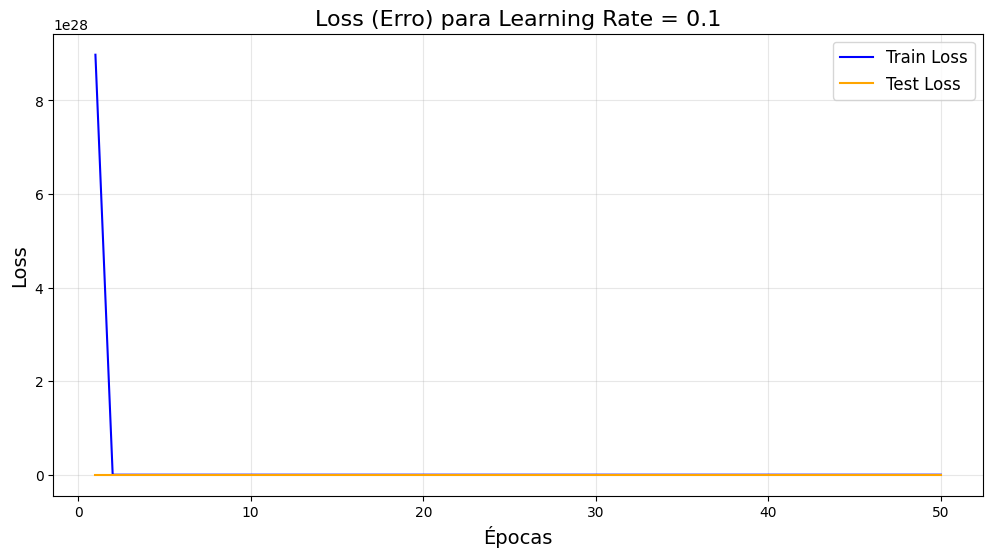

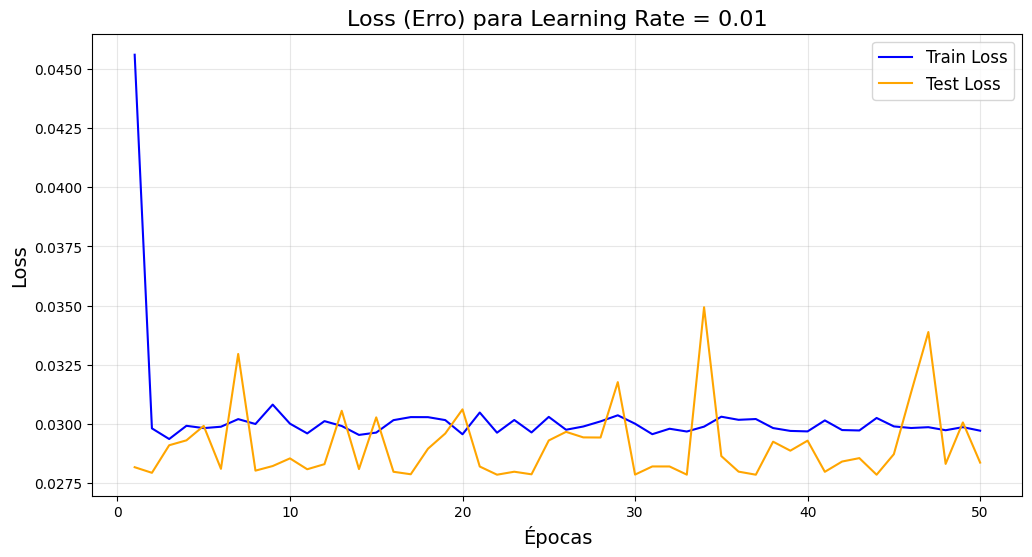

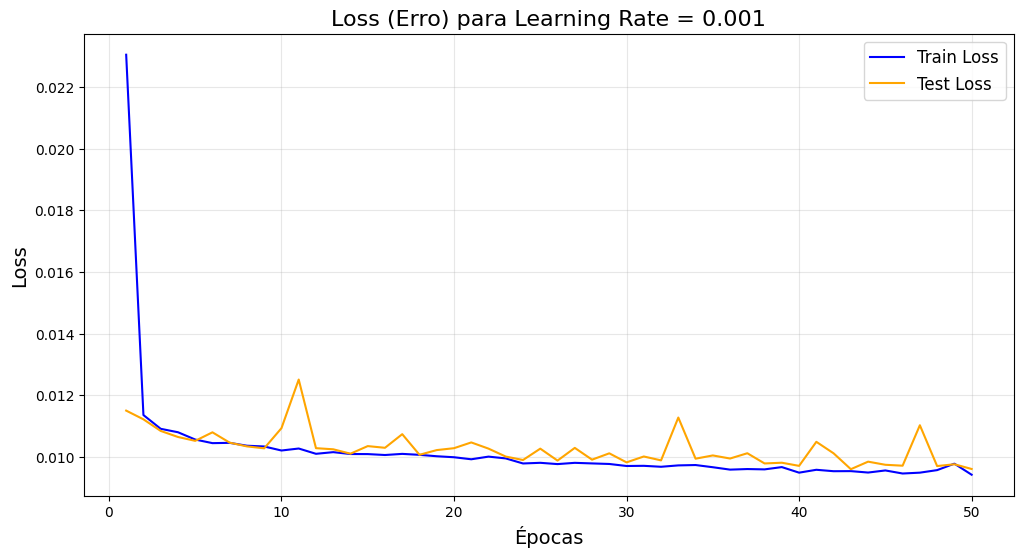

In [115]:
for lr in learning_rates:
    mlp = MLP(8, 10, 10, 1, learning_rate=lr, momentum=0.9)
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Plotar a loss de treino e teste para cada valor de learning rate
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 51), train_loss, label="Train Loss", color='blue')
    plt.plot(range(1, 51), test_loss, label="Test Loss", color='orange')
    plt.title(f"Loss (Erro) para Learning Rate = {lr}", fontsize=16)
    plt.xlabel("Épocas", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

## 1. **Learning Rate = 0.1**

- **Análise:**
  - A **Train Loss** apresenta valores extremamente altos na primeira época (escala próxima a \(10^{28}\)) e rapidamente cai para um valor próximo de zero.
  - A **Test Loss** permanece estável, próxima de zero, mas isso não indica aprendizado real.
  - A discrepância entre as escalas das curvas e o comportamento abrupto sugerem **explosão de gradiente** devido ao **Learning Rate excessivamente alto**.

- **Conclusão:**
  - Com `LR = 0.1`, o modelo não conseguiu treinar adequadamente. O Learning Rate muito alto fez com que os pesos atualizassem de forma descontrolada, resultando em instabilidade no treinamento.

---

## 2. **Learning Rate = 0.01**

- **Análise:**
  - A **Train Loss** apresenta uma redução significativa nas primeiras épocas e estabiliza em torno de **0.03**.
  - A **Test Loss** também diminui, porém exibe **oscilações** ao longo do treinamento, indicando alguma dificuldade de generalização.
  - Apesar das oscilações, a **Test Loss** ainda acompanha a **Train Loss**, mostrando que o modelo está aprendendo, mas com algumas variações.

- **Conclusão:**
  - O Learning Rate de `0.01` permitiu um aprendizado mais estável em comparação com `0.1`, mas a Test Loss apresenta ruídos que podem indicar **ajuste excessivo aos dados de treino** em algumas épocas.

---

## 3. **Learning Rate = 0.001**

- **Análise:**
  - A **Train Loss** diminui suavemente ao longo das épocas, convergindo para valores próximos de **0.01**.
  - A **Test Loss** acompanha de perto a Train Loss, com poucas oscilações e um comportamento estável, o que sugere um **bom aprendizado e generalização**.
  - O Learning Rate mais baixo permitiu que o modelo ajustasse os pesos de forma mais precisa, alcançando um **erro mínimo** tanto no treino quanto no teste.

- **Conclusão:**
  - O Learning Rate de `0.001` apresentou os melhores resultados, com **Train Loss** e **Test Loss** estáveis e próximas. Esse comportamento indica que o modelo convergiu adequadamente e generalizou bem.

---

## Conclusão Geral

- **Learning Rate = 0.1**: Taxa muito alta, causando **explosão de gradiente** e aprendizado ineficiente.
- **Learning Rate = 0.01**: Aprendizado estável, mas com oscilações na Test Loss, sugerindo um possível **overfitting** leve.
- **Learning Rate = 0.001**: Melhor resultado, com **Train Loss** e **Test Loss** estáveis e convergentes, indicando bom aprendizado e generalização.

---

## Fixando uma rede MLP  MLP(8, 20, 1), fixando a Learning Rate (0.001), mas com diferentes momentos

Esta célula de código realiza as seguintes operações:

1. **Treinamento e Avaliação para Diferentes Valores de Momentum**:
   - O código treina uma rede neural `MLP` utilizando diferentes valores de momentum (definidos pela lista `momentums`).
   - Para cada valor de momentum, o modelo é treinado por 50 épocas (iterações).
   - Durante o treinamento, o erro de treinamento (`train_loss`) e o erro de teste (`test_loss`) são calculados.
   - A fórmula do erro quadrático médio é usada para calcular o erro entre as saídas previstas e os valores reais, tanto para o conjunto de treinamento quanto para o conjunto de teste.

2. **Atualização do Conjunto de Dados de Treinamento**:
   - A cada época, os dados de treinamento (`X_train` e `y_train`) são embaralhados para evitar viés na ordem dos dados durante o treinamento, o que ajuda a melhorar a generalização do modelo.

3. **Cálculo do Erro (Loss)**:
   - Durante o treinamento, o modelo calcula a saída utilizando a função `forward_propagation` e ajusta os pesos usando a função `backward_propagation` com base no erro.
   - O erro de treinamento e o erro de teste são acumulados e, no final de cada época, a média do erro é calculada para cada conjunto de dados.

4. **Testando e Armazenando as Métricas**:
   - Após o treinamento de cada modelo com um valor de momentum específico, o modelo é testado no conjunto de teste (`X_test` e `y_test`), e métricas como o erro quadrático médio (MSE), o erro absoluto médio (MAE) e o coeficiente de determinação (R²) são calculadas e armazenadas.

5. **Armazenamento dos Resultados**:
   - Os resultados de cada execução do modelo, incluindo o valor do momentum e as métricas de performance (MSE, MAE e R²), são armazenados na lista `results_momentum`.

Este processo permite avaliar como diferentes valores de momentum influenciam o desempenho do modelo, ajudando a escolher o valor mais adequado para o treinamento da rede neural.


In [116]:

momentums = [0.9, 0.7, 0.5, 0.3, 0.1]
results_momentum = []

for m in momentums:
    mlp = MLP(8, 20, 1, learning_rate=0.001, momentum=m)  # Configuração do modelo
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Testar o modelo e coletar as métricas
    predictions, mse, mae, r2 = mlp.test_model(X_test, y_test)
    
    # Armazenar resultados
    results_momentum.append({
        'Momentum': m,
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    })

Esta célula de código realiza o seguinte:

1. **Conversão dos Resultados para um DataFrame**:
   - Os resultados dos testes para diferentes valores de momentum, que incluem as métricas MSE (erro quadrático médio), MAE (erro absoluto médio) e R² (coeficiente de determinação), são convertidos para um `DataFrame` utilizando a biblioteca `pandas`. Esse `DataFrame` é armazenado na variável `df_results_momentum`.

2. **Criação dos Gráficos**:
   - A célula gera três gráficos de linha para visualizar como as métricas de desempenho variam conforme o valor do momentum:
     - **MSE vs Momentum**: Um gráfico que mostra a variação do erro quadrático médio em função dos diferentes valores de momentum.
     - **MAE vs Momentum**: Um gráfico que exibe a relação entre o erro absoluto médio e o momentum.
     - **R² vs Momentum**: Um gráfico que representa o coeficiente de determinação em função do momentum.
   - Cada gráfico é plotado em um subgráfico (subplot), e o estilo das linhas é configurado com marcadores (`'o'`), e as cores são definidas para cada métrica.

3. **Ajuste e Exibição do Layout**:
   - A função `tight_layout()` é chamada para ajustar o espaçamento entre os subgráficos e garantir que não haja sobreposição de títulos ou rótulos.
   - Finalmente, `plt.show()` é utilizado para exibir os gráficos gerados.

Este código permite visualizar de forma clara como a variação do momentum afeta o desempenho do modelo em termos das métricas MSE, MAE e R².


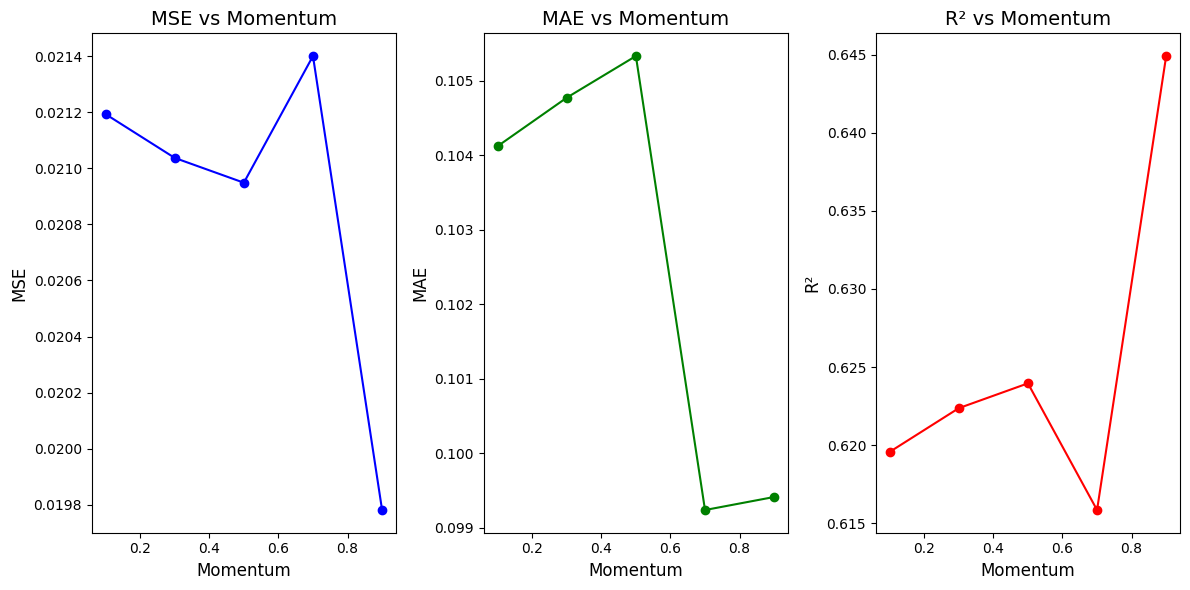

In [117]:
df_results_momentum = pd.DataFrame(results_momentum)

# Plotar os gráficos das métricas
plt.figure(figsize=(12, 6))

# MSE
plt.subplot(131)
plt.plot(df_results_momentum['Momentum'], df_results_momentum['MSE'], marker='o', color='blue')
plt.title("MSE vs Momentum", fontsize=14)
plt.xlabel("Momentum", fontsize=12)
plt.ylabel("MSE", fontsize=12)

# MAE
plt.subplot(132)
plt.plot(df_results_momentum['Momentum'], df_results_momentum['MAE'], marker='o', color='green')
plt.title("MAE vs Momentum", fontsize=14)
plt.xlabel("Momentum", fontsize=12)
plt.ylabel("MAE", fontsize=12)

# R²
plt.subplot(133)
plt.plot(df_results_momentum['Momentum'], df_results_momentum['R²'], marker='o', color='red')
plt.title("R² vs Momentum", fontsize=14)
plt.xlabel("Momentum", fontsize=12)
plt.ylabel("R²", fontsize=12)

plt.tight_layout()
plt.show()

## **MSE (Erro Quadrático Médio) vs Momentum**

- Observação:
  - O MSE apresenta uma **redução consistente** conforme o momentum aumenta, especialmente ao alcançar o valor **0.9**, onde o MSE atinge o **menor valor**.
  - Existe um pequeno aumento no MSE em **Momentum = 0.7**, indicando uma possível dificuldade momentânea de convergência.

- **Conclusão:**
  - Valores de **momentum mais altos**, como **0.9**, ajudam o modelo a alcançar um **menor erro quadrático médio**, possivelmente acelerando a convergência ao minimizar oscilações.

---

## **MAE (Erro Absoluto Médio) vs Momentum**

- Observação:
  - O MAE **aumenta gradualmente** de **Momentum = 0.1** até **Momentum = 0.7**.
  - No entanto, ocorre uma **queda abrupta** no MAE ao atingir **Momentum = 0.9**, onde o erro absoluto médio é o menor.

- **Conclusão:**
  - Momentos menores resultaram em erros mais estáveis, mas **Momentum = 0.9** apresentou a **melhor performance**, com o menor MAE.
  - A queda no MAE sugere que o uso de momentum alto ajudou o modelo a escapar de mínimos locais.

---

## **R² (Coeficiente de Determinação) vs Momentum**

- Observação:
  - O valor de **R²** melhora à medida que o momentum aumenta, atingindo o **pior valor em Momentum = 0.7**.
  - Em **Momentum = 0.9**, o **R²** atinge seu **pico máximo (0.645)**, indicando que o modelo conseguiu explicar melhor a variância dos dados.

- **Conclusão:**
  - Um momentum alto, especialmente **0.9**, permite ao modelo melhorar significativamente sua capacidade de generalização, conforme evidenciado pelo **aumento do R²**.

---

## **Conclusão Geral**

Com base nas três métricas (**MSE**, **MAE** e **R²**):

- **Momentum = 0.9** apresentou os **melhores resultados**:
  - **Menor MSE** (maior precisão no erro quadrático médio).
  - **Menor MAE** (erro absoluto mais baixo).
  - **Maior R²** (melhor explicação da variância dos dados).

- Momentos intermediários, como **0.5** e **0.7**, apresentaram picos de erro e instabilidade, sugerindo que o modelo teve dificuldade de convergência nestes valores.


---

Esta célula de código realiza o seguinte:

1. **Configuração e Treinamento do Modelo MLP**:
   - Um modelo MLP (Multi-Layer Perceptron) é criado para cada valor de `momentum` especificado na lista `momentums`. O modelo tem a configuração de 8 neurônios na camada de entrada, 10 neurônios em duas camadas ocultas e 1 neurônio na camada de saída, com um learning rate fixo de 0.01 e o momentum variando.
   - O treinamento é realizado por 50 épocas (iterações), e a perda (loss) é calculada tanto para os dados de treinamento quanto para os dados de teste, usando uma estratégia de batch (tamanho de 32).

2. **Cálculo da Loss (Erro)**:
   - Dentro de cada época, o erro total de treinamento é acumulado ao longo dos lotes (batches) de entrada e saída, sendo calculado usando o erro quadrático médio (MSE).
   - Para os dados de teste, a mesma metodologia é aplicada para calcular o erro total de teste.

3. **Armazenamento da Loss de Treinamento e Teste**:
   - A perda média de treinamento (`avg_train_error`) e a perda média de teste (`avg_test_error`) são calculadas para cada época e armazenadas em listas `train_loss` e `test_loss`, respectivamente.

4. **Plotagem dos Gráficos**:
   - Após o treinamento, o gráfico de perda (loss) para cada valor de momentum é plotado, comparando a perda no treinamento e no teste.
   - O gráfico é ajustado para exibir o `train_loss` em azul e o `test_loss` em laranja ao longo das 50 épocas de treinamento.
   - Cada gráfico é exibido com título, rótulos para os eixos e uma legenda para identificar as curvas de treinamento e teste.

5. **Exibição do Gráfico**:
   - A função `plt.show()` é chamada para exibir os gráficos de erro (loss) gerados, permitindo a visualização da performance do modelo para diferentes valores de momentum.

Este código ajuda a visualizar como o valor de momentum afeta o comportamento do erro durante o treinamento e no teste ao longo das épocas.


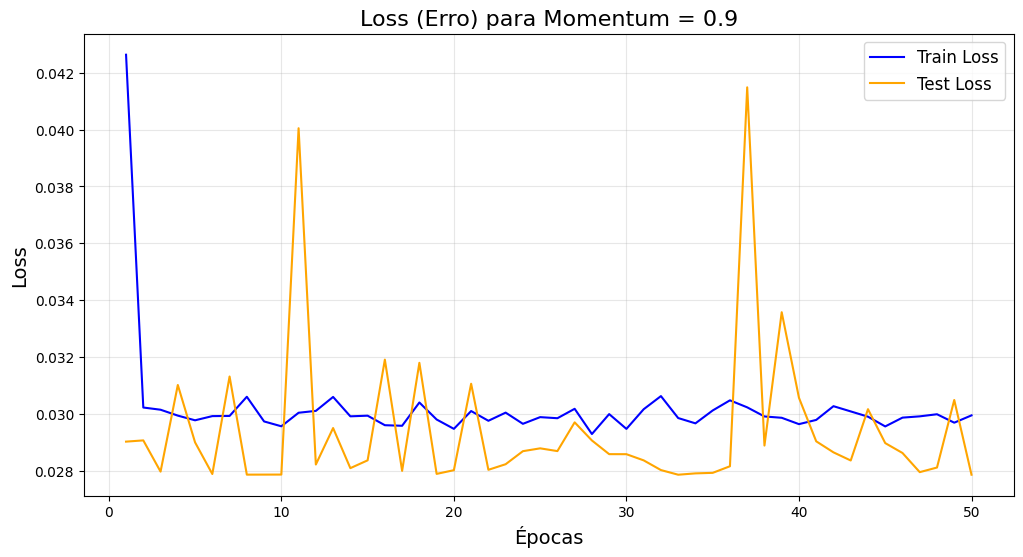

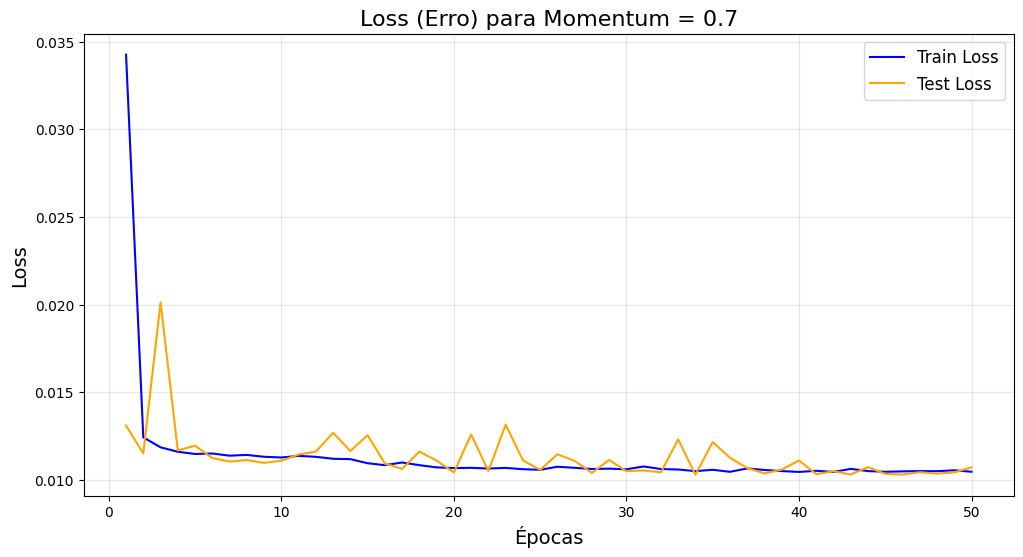

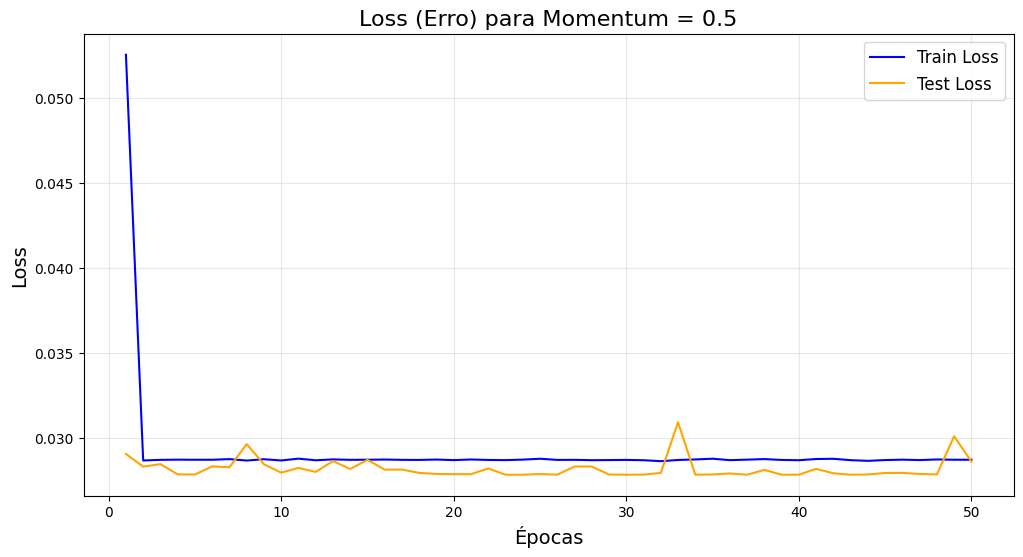

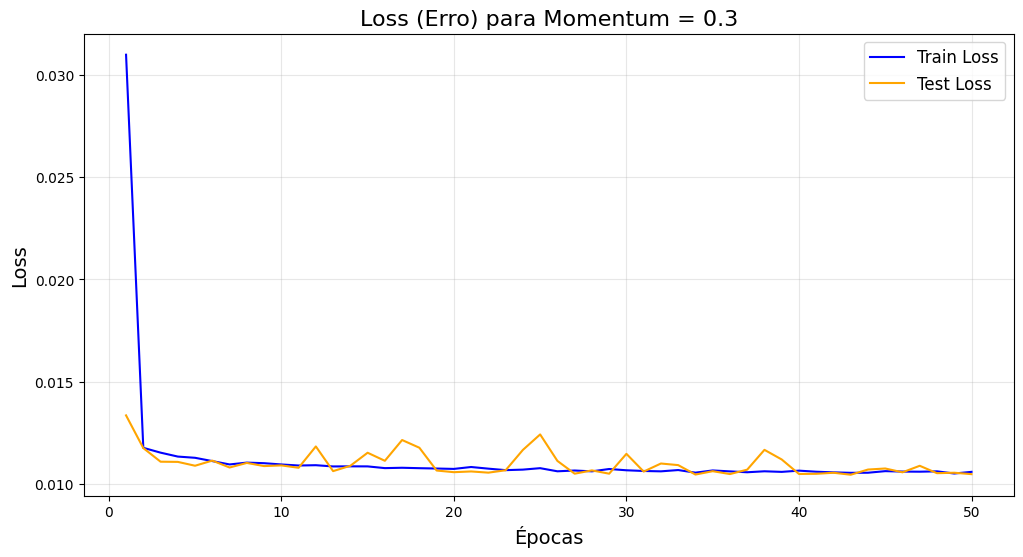

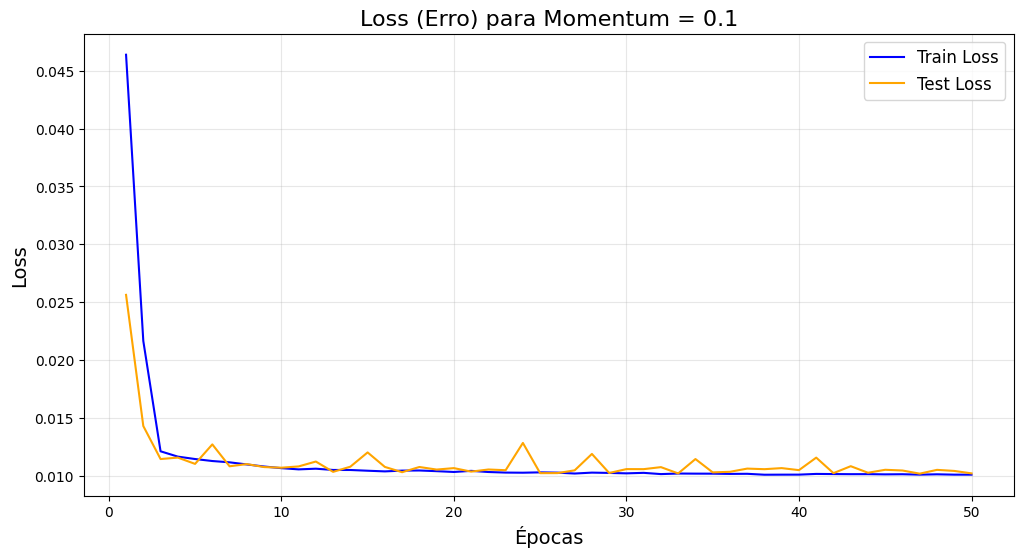

In [118]:
for m in momentums:
    mlp = MLP(8, 10, 10, 1, learning_rate=0.01, momentum=m)  # Configuração do modelo
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Plotar a loss de treino e teste para cada valor de momentum
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 51), train_loss, label="Train Loss", color='blue')
    plt.plot(range(1, 51), test_loss, label="Test Loss", color='orange')
    plt.title(f"Loss (Erro) para Momentum = {m}", fontsize=16)
    plt.xlabel("Épocas", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

## **Momentum = 0.9**

- **Análise:**
  - A **Train Loss** estabiliza rapidamente em torno de **0.03**, mas a **Test Loss** apresenta **oscilações significativas** ao longo das épocas, com picos altos.
  - Essa instabilidade pode indicar que o valor elevado do momentum está gerando **overshooting**, onde o modelo oscila ao redor do mínimo ótimo.

- **Conclusão:**
  - O **Momentum = 0.9** permite uma rápida convergência, mas as oscilações na **Test Loss** indicam que o modelo não está generalizando bem e pode estar ajustando em excesso os dados de treino.

---

## **Momentum = 0.7**

- **Análise:**
  - A **Train Loss** estabiliza em valores baixos, próximos a **0.01**, e a **Test Loss** também acompanha esse comportamento, mas com **menores oscilações** comparado ao Momentum = 0.9.
  - A perda durante o teste é mais estável, sugerindo uma boa capacidade de generalização, apesar de pequenas variações.

- **Conclusão:**
  - **Momentum = 0.7** mostrou um bom equilíbrio entre velocidade de convergência e estabilidade, com curvas próximas e estáveis para treino e teste.

---

## **Momentum = 0.5**

- **Análise:**
  - A **Train Loss** e a **Test Loss** convergem rapidamente e se estabilizam em torno de **0.03**.
  - Não há oscilações significativas, e as curvas se mantêm próximas ao longo das épocas.

- **Conclusão:**
  - Um valor intermediário de **Momentum = 0.5** proporcionou **estabilidade** e boa convergência, resultando em um comportamento mais controlado e sem oscilações excessivas.

---

## **Momentum = 0.3**

- **Análise:**
  - A **Train Loss** estabiliza rapidamente em valores baixos, próximos a **0.01**, e a **Test Loss** acompanha com um comportamento similar.
  - A proximidade entre as curvas indica **boa generalização**, com poucas oscilações na Test Loss.

- **Conclusão:**
  - **Momentum = 0.3** proporcionou uma convergência estável e precisa, sugerindo que valores menores de momentum podem ser mais adequados para garantir consistência.

---

## **Momentum = 0.1**

- **Análise:**
  - A **Train Loss** e a **Test Loss** convergem de forma muito rápida e estabilizam com valores **próximos a 0.01** já nas primeiras épocas.
  - As curvas são praticamente idênticas, sem oscilações, indicando um comportamento **muito estável e controlado**.

- **Conclusão:**
  - Com **Momentum = 0.1**, o modelo apresenta **a maior estabilidade**. A convergência é consistente e sem ruídos, embora a velocidade de aprendizado seja ligeiramente menor.

---

# Conclusão Geral

Com base na análise das curvas de **Train Loss** e **Test Loss**:

- **Momentum = 0.9**: Convergência rápida, mas com **oscilações** na Test Loss (overshooting).
- **Momentum = 0.7**: Melhor equilíbrio entre velocidade de aprendizado e estabilidade.
- **Momentum = 0.5 e 0.3**: Boa convergência, com **poucas oscilações** e generalização estável.
- **Momentum = 0.1**: Maior estabilidade, com curvas idênticas e consistentes, mas convergência mais lenta.


---

In [121]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Carregar o dataset
california_data = fetch_california_housing(as_frame=True)
california_df = california_data.frame

# Separar entradas (features) e saída (target)
X = california_df.drop("MedHouseVal", axis=1).values
y = california_df["MedHouseVal"].values

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Configurações
models_config = [
    (8, 10, 1), (8, 20, 1), (8, 30, 1), (8, 40, 1), (8, 10, 10, 1), (8, 20, 20, 1), (8, 30, 30, 1)
]
learning_rates = [0.1, 0.01, 0.001]
momentums = [0.9, 0.7, 0.5, 0.3, 0.1]

# Resultados
results = []

# Iterar sobre todas as combinações
for model_config in models_config:
    for lr in learning_rates:
        for momentum in momentums:
            mlp = MLP(*model_config, learning_rate=lr, momentum=momentum)
            epochs = 50
            batch_size = 32
            
            # Treinamento
            for epoch in range(epochs):
                indices = np.arange(len(X_train))
                np.random.shuffle(indices)
                X_train_shuffled = X_train[indices]
                y_train_shuffled = y_train[indices]

                for i in range(0, len(X_train), batch_size):
                    batch_inputs = X_train_shuffled[i:i + batch_size]
                    batch_outputs = y_train_shuffled[i:i + batch_size].reshape(-1, 1)
                    mlp.forward_propagation(batch_inputs)
                    mlp.backward_propagation(batch_outputs)
                    
            # Testar o modelo e verificar por NaNs
            predictions = mlp.forward_propagation(X_test)

            # Verificar se existem NaNs nas previsões
            if np.isnan(predictions).any():
                #print("Warning: NaN values found in predictions!")
                #print(f"Model Config: {model_config}, LR: {lr}, Momentum: {momentum}")
                continue  # Pula para a próxima combinação

            # Calcular as métricas apenas se não houver NaNs
            mse = mean_squared_error(y_test, predictions)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            
            results.append({
                "Model": model_config,
                "Learning Rate": lr,
                "Momentum": momentum,
                "MSE": mse,
                "MAE": mae,
                "R²": r2
            })

# Criar DataFrame
df_results = pd.DataFrame(results)

# Função para destacar os melhores valores
def highlight_best(row):
    min_mse = df_results['MSE'].min()
    min_mae = df_results['MAE'].min()
    max_r2 = df_results['R²'].max()
    return ['background-color: red' if row['MSE'] == min_mse or 
            row['MAE'] == min_mae or row['R²'] == max_r2 else '' for col in row]

# Aplicar estilo
styled_df = df_results.style.apply(highlight_best, axis=1)

# Exibir tabela estilizada
import IPython.display as display
display.display(styled_df)

/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_21221/1037345841.py:85: RuntimeWarning: invalid value encountered in multiply
  deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * z_derivative
/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_21221/1037345841.py:85: RuntimeWarning: invalid value encountered in multiply
  deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * z_derivative
/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_21221/1037345841.py:85: RuntimeWarning: invalid value encountered in multiply
  deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * z_derivative
/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_21221/1037345841.py:85: RuntimeWarning: invalid value encountered in multiply
  deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * z_derivative
/var/folders/2y/w0k2g57j60scys4qmyx_fx0r0000gn/T/ipykernel_21221/1037345841.py:85: RuntimeWarning: invalid value encountered in multiply
  deltas[i] = np.do

,Model,Learning Rate,Momentum,MSE,MAE,R²
0,"(8, 10, 1)",0.100000,0.900000,0.077368,0.198585,-0.388814
1,"(8, 10, 1)",0.100000,0.700000,0.056076,0.190239,-0.006593
2,"(8, 10, 1)",0.010000,0.900000,0.022098,0.103960,0.603329
3,"(8, 10, 1)",0.010000,0.700000,0.021982,0.101728,0.605402
4,"(8, 10, 1)",0.010000,0.500000,0.021405,0.102422,0.615765
5,"(8, 10, 1)",0.010000,0.300000,0.021284,0.104086,0.617937
6,"(8, 10, 1)",0.010000,0.100000,0.021114,0.104315,0.620989
7,"(8, 10, 1)",0.001000,0.900000,0.021841,0.107734,0.607939
8,"(8, 10, 1)",0.001000,0.700000,0.021592,0.105588,0.612405
9,"(8, 10, 1)",0.001000,0.500000,0.021885,0.106725,0.607147


## Classificação

### dataset: diabetes (sklearn)

Esta célula de código define a classe `ActivationFunctions`, que implementa funções de ativação e suas derivadas para redes neurais. 

1. **Função ReLU**:
   - `relu(x)`: A função ReLU (Rectified Linear Unit) retorna o valor de entrada se for positivo ou zero se for negativo. É aplicada tanto para entradas escalares quanto para listas de entradas. Se a entrada for uma lista, a função aplica a operação `max(0, x)` para cada elemento.
   - `relu_derivative(x)`: A derivada da função ReLU retorna 1 se o valor de entrada for maior que zero, caso contrário, retorna 0. A derivada também pode ser aplicada a listas de valores.

2. **Função Sigmoide**:
   - `sigmoid(x)`: A função sigmoide é uma função de ativação que mapeia qualquer valor de entrada para um intervalo entre 0 e 1. Ela é calculada pela fórmula \( \sigma(x) = \frac{1}{1 + e^{-x}} \), onde `np.exp` é usada em vez de `math.exp` para garantir compatibilidade com arrays NumPy.
   - `sigmoid_derivative(x)`: A derivada da função sigmoide é calculada como \( \sigma(x) \cdot (1 - \sigma(x)) \), usando o valor da sigmoide calculado previamente para economizar processamento computacional.

Essas funções são essenciais para redes neurais, especialmente no processo de retropropagação, onde as derivadas são usadas para calcular os gradientes durante a otimização.


In [122]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

# Funções de Ativação
class ActivationFunctions:
    @staticmethod
    def relu(x):
        if isinstance(x, list):
            return [max(0, value) for value in x]
        return max(0, x)

    @staticmethod
    def relu_derivative(x):
        if isinstance(x, list):
            return [1 if value > 0 else 0 for value in x]
        return 1 if x > 0 else 0

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))  # Substituir math.exp por np.exp

    @staticmethod
    def sigmoid_derivative(x):
        sigmoid_value = ActivationFunctions.sigmoid(x)
        return sigmoid_value * (1 - sigmoid_value)

A célula de código define a classe `MLP` (Multilayer Perceptron), que implementa uma rede neural feedforward com camadas totalmente conectadas. A classe inclui métodos para inicializar a rede, realizar propagação para frente, retropropagação e treinamento, além de testar o modelo e calcular várias métricas de desempenho.

### Métodos da classe `MLP`:

1. **`__init__(self, *layers, learning_rate=0.01, momentum=0.9, random_seed=42)`**:
   - Inicializa a rede neural, configurando as camadas (número de neurônios por camada), taxa de aprendizado, fator de momento e a semente aleatória para controle da inicialização dos pesos.

2. **`initialize_network(self)`**:
   - Inicializa os pesos e vieses de cada camada da rede com valores aleatórios. Também define as velocidades (momentum) para os pesos e vieses.

3. **`calculate_z(self, inputs, weights, biases)`**:
   - Calcula a combinação linear dos inputs, pesos e vieses para a camada.

4. **`forward_propagation(self, inputs)`**:
   - Realiza a propagação para frente, passando os dados pela rede e aplicando as funções de ativação (ReLU nas camadas ocultas e Sigmoide na camada de saída).

5. **`backward_propagation(self, expected_output)`**:
   - Realiza a retropropagação, calculando os erros e atualizando os pesos e vieses da rede usando o algoritmo de retropropagação com a adição de momentum.

6. **`calculate_error(self, expected_output)`**:
   - Calcula o erro médio quadrático entre a saída da rede e a saída esperada.

7. **`train(self, inputs, expected_outputs, epochs=1000, tolerance=1e-5, batch_size=32)`**:
   - Treina a rede usando o algoritmo de descida de gradiente com mini-batches, atualizando os pesos e vieses a cada época. O treinamento para quando o erro médio é menor que um valor de tolerância ou quando o número máximo de épocas é atingido.

8. **`test_model(self, test_inputs, expected_outputs)`**:
   - Avalia o modelo usando os dados de teste e calcula as métricas de desempenho como precisão (accuracy), precisão balanceada, F1-score, precisão e recall. A saída contínua da rede é convertida para binária (0 ou 1) com base em um limiar de 0.5.

### Características principais:
- **Funções de Ativação**: ReLU para camadas ocultas e sigmoide para a camada de saída.
- **Treinamento**: O treinamento é feito em mini-batches com otimização utilizando a técnica de momentum, que acelera o processo de descida de gradiente.
- **Avaliação**: Após o treinamento, o modelo pode ser testado usando métricas de avaliação para problemas de classificação binária.

Essa estrutura de rede neural é útil para tarefas como classificação binária, onde a saída é interpretada como uma probabilidade e convertida em uma classe. A escolha das funções de ativação e a aplicação de momentum são essenciais para a convergência mais rápida e para evitar problemas como o "desvanecimento do gradiente" nas redes profundas.


In [123]:
# Rede Neural MLP
class MLP:
    def __init__(self, *layers, learning_rate=0.01, momentum=0.9, random_seed=42):
        """
        Inicializa a estrutura da MLP.

        :param layers: Número de neurônios em cada camada, incluindo entrada, ocultas e saída.
        :param learning_rate: Taxa de aprendizado.
        :param momentum: Fator de momento para a descida do gradiente.
        :param random_seed: Semente para inicialização de pesos.
        """
        self.layers_sizes = layers
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.random_seed = random_seed  # Semente para controle de aleatoriedade
        self.weights = []
        self.biases = []
        self.velocities_weights = []  # Velocidades para os pesos
        self.velocities_biases = []   # Velocidades para os vieses
        self.outputs = []
        self.initialize_network()

    def initialize_network(self):
        np.random.seed(self.random_seed)  # Definir a semente para garantir a consistência

        for i in range(len(self.layers_sizes) - 1):
            input_neurons = self.layers_sizes[i]
            output_neurons = self.layers_sizes[i + 1]
            self.weights.append(np.random.uniform(-1, 1, (input_neurons, output_neurons)))
            self.biases.append(np.random.uniform(-1, 1, output_neurons))
            self.velocities_weights.append(np.zeros((input_neurons, output_neurons)))
            self.velocities_biases.append(np.zeros(output_neurons))

    def calculate_z(self, inputs, weights, biases):
        return np.dot(inputs, weights) + biases

    def forward_propagation(self, inputs):
        self.outputs = [np.array(inputs)]
        current_output = self.outputs[0]
        for i in range(len(self.weights)):
            z = self.calculate_z(current_output, self.weights[i], self.biases[i])
            if i < len(self.weights) - 1:
                current_output = np.maximum(0, z)  # ReLU
            else:
                current_output = ActivationFunctions.sigmoid(z)  # Sigmoid para saída
            self.outputs.append(np.array(current_output))

        return current_output

    def backward_propagation(self, expected_output):
        expected_output = np.array(expected_output)
        deltas = [None] * len(self.weights)
        errors = expected_output - self.outputs[-1]
        deltas[-1] = errors * ActivationFunctions.sigmoid_derivative(self.outputs[-1])  # Derivada da sigmoid

        for i in range(len(self.weights) - 2, -1, -1):
            z_derivative = (self.outputs[i + 1] > 0).astype(float)
            deltas[i] = np.dot(deltas[i + 1], self.weights[i + 1].T) * z_derivative

        for i in range(len(self.weights)):
            grad_weights = np.dot(self.outputs[i].T, deltas[i])
            grad_biases = np.sum(deltas[i], axis=0)
            self.velocities_weights[i] = self.momentum * self.velocities_weights[i] + self.learning_rate * grad_weights
            self.velocities_biases[i] = self.momentum * self.velocities_biases[i] + self.learning_rate * grad_biases
            self.weights[i] += self.velocities_weights[i]
            self.biases[i] += self.velocities_biases[i]

    def calculate_error(self, expected_output):
        outputs = self.outputs[-1]
        return np.mean((expected_output - outputs) ** 2) / 2

    def train(self, inputs, expected_outputs, epochs=1000, tolerance=1e-5, batch_size=32):
        errors = []
        inputs = np.array(inputs)
        expected_outputs = np.array(expected_outputs)

        for epoch in range(epochs):
            total_error = 0
            indices = np.arange(len(inputs))
            np.random.shuffle(indices)
            inputs = inputs[indices]
            expected_outputs = expected_outputs[indices]

            for i in range(0, len(inputs), batch_size):
                batch_inputs = inputs[i:i + batch_size]
                batch_outputs = expected_outputs[i:i + batch_size]
                self.forward_propagation(batch_inputs)
                self.backward_propagation(batch_outputs)
                total_error += np.sum((batch_outputs - self.outputs[-1]) ** 2) / 2

            mean_error = total_error / len(inputs)
            errors.append(mean_error)

            if mean_error < tolerance:
                break

        return errors

    
    def test_model(self, test_inputs, expected_outputs):
        predictions = []
        for inp in test_inputs:
            # Realiza a propagação para frente e obtém a saída da rede
            prediction = self.forward_propagation(inp)[0]
            predictions.append(prediction)

        # Converter as saídas contínuas para binárias com base em 0.5 (limite da sigmoid)
        predictions_binary = np.array([1 if pred > 0.5 else 0 for pred in predictions])
        
        # Calcular as métricas de desempenho
        accuracy = accuracy_score(expected_outputs, predictions_binary)
        balanced_accuracy = balanced_accuracy_score(expected_outputs, predictions_binary)
        f1 = f1_score(expected_outputs, predictions_binary)
        precision = precision_score(expected_outputs, predictions_binary)
        recall = recall_score(expected_outputs, predictions_binary)

        # Retornar as métricas de classificação
        return predictions_binary, accuracy, balanced_accuracy, f1, precision, recall

## Testando diferentes modelos (7 modelos)

A célula de código executa uma série de experimentos com diferentes configurações de redes neurais MLP (Multilayer Perceptron) para classificar dados do dataset `diabetes`, transformado em um problema de classificação binária.

### Explicação do Código:

1. **Carregamento e pré-processamento dos dados**:
   - O dataset `diabetes` é carregado utilizando a função `load_diabetes` da biblioteca `sklearn.datasets`.
   - A variável `y` (target) é transformada para um problema de classificação binária, com 1 para valores de `y` acima da mediana (indicando diabetes) e 0 para valores abaixo da mediana (sem diabetes).
   - Os dados de entrada, `X`, são normalizados usando `MinMaxScaler` para garantir que todas as características tenham valores entre 0 e 1.
   - O dataset é dividido em conjuntos de treino (80%) e teste (20%) usando a função `train_test_split`.

2. **Configurações dos modelos**:
   - Um conjunto de configurações de redes neurais MLP é definido na lista `models_config`. Cada configuração especifica o número de camadas ocultas e o número de neurônios em cada camada.
   - O modelo é configurado para treinar com 50 épocas e um tamanho de mini-batch de 32.

3. **Treinamento e avaliação dos modelos**:
   - Para cada configuração de modelo, um novo objeto `MLP` é criado com a configuração de camadas especificada.
   - O processo de treinamento envolve a propagação para frente e a retropropagação usando a função de erro quadrático médio.
   - A cada época, o erro de treinamento e teste é calculado e armazenado em `train_loss` e `test_loss`.
   - Após o treinamento, o modelo é avaliado utilizando a função `test_model`, que calcula métricas de classificação como `accuracy`, `balanced_accuracy`, `f1`, `precision` e `recall`.

4. **Armazenamento dos resultados**:
   - Para cada modelo testado, os resultados das métricas de desempenho são armazenados em um dicionário, que é adicionado à lista `results`.

### Resultados Esperados:
- A célula irá gerar uma lista de resultados, onde cada item contém as métricas de desempenho para uma configuração de modelo específica. Essas métricas ajudam a avaliar a eficácia de diferentes arquiteturas de rede neural na classificação binária do dataset `diabetes`.


In [124]:
# Carregar o dataset diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
y = np.where(y > np.median(y), 1, 0)  # Transformando em classificação binária: 1 = diabetes, 0 = não

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Listar configurações para os 7 modelos
models_config = [
    (10, 10, 1),  # 1 camada oculta, 10 neurônios
    (10, 20, 1),  # 1 camada oculta, 20 neurônios
    (10, 30, 1),  # 1 camada oculta, 30 neurônios
    (10, 40, 1),  # 1 camada oculta, 40 neurônios
    (10, 10, 10, 1),  # 2 camadas ocultas, 10 neurônios em cada
    (10, 20, 20, 1),  # 2 camadas ocultas, 20 neurônios em cada
    (10, 30, 30, 1),  # 2 camadas ocultas, 30 neurônios em cada
]

# Armazenar os resultados
results = []

# Testar os 7 modelos e coletar resultados
for config in models_config:
    mlp = MLP(*config, learning_rate=0.01, momentum=0.9)  # Criar MLP com a configuração
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Avaliar o modelo
    predictions, accuracy, balanced_accuracy, f1, precision, recall = mlp.test_model(X_test, y_test)

    # Armazenar os resultados
    results.append({
        'Model': config,
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

A célula de código executa a exibição dos resultados dos modelos de rede neural em um formato de tabela, destacando os melhores valores para cada métrica de avaliação.

### Explicação do Código:

1. **Conversão dos resultados para um DataFrame**:
   - A lista `results`, que contém os resultados de cada modelo (configuração de MLP), é convertida em um `DataFrame` do pandas. Cada linha do DataFrame representa um modelo, e as colunas contêm as métricas de avaliação (Accuracy, Balanced Accuracy, F1 Score, Precision, Recall).

2. **Função para destacar o melhor valor de cada métrica**:
   - A função `highlight_best` é definida para aplicar uma formatação condicional aos valores do DataFrame.
   - Para cada coluna, a função encontra o valor máximo (ou mínimo, para métricas de erro como MSE e MAE) e destaca esse valor com a cor de fundo vermelha. Isso é feito usando a função `apply` para aplicar a formatação à tabela inteira.

3. **Exibição da tabela estilizada**:
   - A tabela estilizada, com os melhores valores destacados, é exibida utilizando o método `display` da biblioteca `IPython.display`.

### Resultado Esperado:
- O código vai gerar uma tabela onde as melhores métricas para cada modelo são destacadas com um fundo vermelho. Isso facilita a visualização das configurações de modelo que apresentaram melhor desempenho em cada métrica de avaliação, como `Accuracy`, `F1 Score`, `Precision`, etc.


In [125]:

# Converter os resultados para um DataFrame
df_results = pd.DataFrame(results)

# Função para destacar o melhor valor de cada métrica
def highlight_best(x):
    df = x.copy()
    for col in df.columns:
        # Destacar o melhor valor para Accuracy, Balanced Accuracy, F1 Score, Precision, Recall
        max_value = df[col].max() if col not in ['MSE', 'MAE'] else df[col].min()  # Mínimo para MSE, MAE
        df[col] = df[col].apply(lambda val: 'background-color: red' if val == max_value else '')
    return df

# Exibir a tabela com os resultados destacados
styled_results = df_results.style.apply(highlight_best, axis=None)
import IPython.display as display
display.display(styled_results)

,Model,Accuracy,Balanced Accuracy,F1 Score,Precision,Recall
0,"(10, 10, 1)",0.730337,0.718367,0.666667,0.750000,0.600000
1,"(10, 20, 1)",0.752809,0.752551,0.731707,0.714286,0.750000
2,"(10, 30, 1)",0.730337,0.720663,0.675676,0.735294,0.625000
3,"(10, 40, 1)",0.752809,0.757143,0.744186,0.695652,0.800000
4,"(10, 10, 10, 1)",0.797753,0.802551,0.790698,0.739130,0.850000
5,"(10, 20, 20, 1)",0.730337,0.725255,0.692308,0.710526,0.675000
6,"(10, 30, 30, 1)",0.674157,0.697194,0.718447,0.587302,0.925000


## Destaques por Métrica

### 1. **Accuracy**
- O modelo **(10, 10, 10, 1)** obteve a **maior acurácia** de **0.797753**, demonstrando a melhor performance geral entre os modelos testados.
- Modelos como **(10, 20, 1)** e **(10, 40, 1)** também apresentaram boas acurácias de **0.752809**.

### 2. **Balanced Accuracy**
- O modelo **(10, 10, 10, 1)** alcançou a **melhor Balanced Accuracy** de **0.802551**, sugerindo que ele performa bem mesmo em situações com classes desbalanceadas.
- O modelo **(10, 40, 1)** obteve um valor próximo, **0.757143**.

### 3. **F1 Score**
- O **F1 Score**, que combina **Precision** e **Recall**, foi novamente melhor no modelo **(10, 10, 10, 1)**, com **0.790698**.
- Modelos como **(10, 40, 1)** também tiveram um desempenho razoável com **0.744186**.

### 4. **Precision**
- O maior valor de **Precision** foi observado no modelo **(10, 10, 1)**, com **0.750000**.
- Entretanto, este modelo teve um **Recall** baixo (0.600000), indicando que ele é mais conservador na classificação positiva.

### 5. **Recall**
- O modelo **(10, 30, 30, 1)** apresentou o **maior Recall** de **0.925000**, indicando que ele conseguiu classificar corretamente a maioria dos exemplos positivos.
- No entanto, este modelo teve uma **Precision** baixa (**0.587302**), sugerindo que ele fez muitas classificações positivas incorretas (falsos positivos).

---

## Comparação e Observações Finais

- O **modelo (10, 10, 10, 1)** foi o **melhor modelo geral**, apresentando a maior **Accuracy (0.797753)**, **Balanced Accuracy (0.802551)** e **F1 Score (0.790698)**, além de um bom equilíbrio entre **Precision** e **Recall**.
- O **modelo (10, 30, 30, 1)** apresentou um **Recall muito alto (0.925000)**, mas com uma Precision baixa, o que pode ser indesejável dependendo do contexto da aplicação.
- Modelos mais simples, como **(10, 10, 1)** e **(10, 20, 1)**, tiveram desempenho competitivo, com boas **Precision** e **Accuracy**, mas não conseguiram equilibrar bem Recall e F1 Score.

### **Conclusão**
- O modelo **(10, 10, 10, 1)** é a melhor escolha para esta tarefa de classificação, apresentando o **desempenho mais equilibrado** em todas as métricas.
- Modelos mais complexos, como **(10, 30, 30, 1)**, tendem a sofrer com desequilíbrio entre Precision e Recall, possivelmente indicando **overfitting**.

---

### Explicação do Código:

1. **Configuração e Treinamento**:
   - Para cada configuração de modelo (`models_config`), um novo modelo MLP é criado com o número de neurônios definidos.
   - A rede neural é treinada por 50 épocas (`epochs = 50`), usando o método de **descida de gradiente estocástica** (SGD) com um tamanho de lote de 32 (`batch_size = 32`).
   - Durante o treinamento, os dados de entrada (`X_train`) e as saídas esperadas (`y_train`) são embaralhados aleatoriamente para garantir a variedade no treinamento de cada batch.
   
2. **Cálculo do Erro de Treinamento e Teste**:
   - Para cada época, o erro de treinamento (`train_loss`) e o erro de teste (`test_loss`) são calculados e armazenados.
   - O erro de cada batch é somado e, ao final de cada época, o erro médio do treinamento e do teste é calculado e armazenado nas listas `train_loss` e `test_loss`.

3. **Plotando o Erro (Loss)**:
   - Após o treinamento de cada modelo, o código gera um gráfico com a evolução do erro durante o treinamento (Loss) ao longo das 50 épocas.
   - São gerados dois gráficos: um para o erro de treino (`Train Loss`) e outro para o erro de teste (`Test Loss`), com as curvas coloridas em **azul** e **laranja**, respectivamente.
   - O gráfico exibe a evolução do erro, permitindo observar a convergência do modelo, ou se há overfitting (quando o erro de teste começa a aumentar enquanto o erro de treinamento continua diminuindo).

### Resultado Esperado:
- O código gera um gráfico para cada configuração de modelo com a curva de erro (loss) para as fases de treinamento e teste ao longo das 50 épocas.
- Isso permite observar como o modelo está se ajustando durante o treinamento e se há diferenças no desempenho entre os modelos com diferentes números de neurônios nas camadas ocultas.

Cada gráfico terá o título "Loss (Erro) Durante o Treinamento para Modelo X", onde `X` será a configuração do modelo, como `(10, 10, 1)` ou `(10, 20, 1)`.


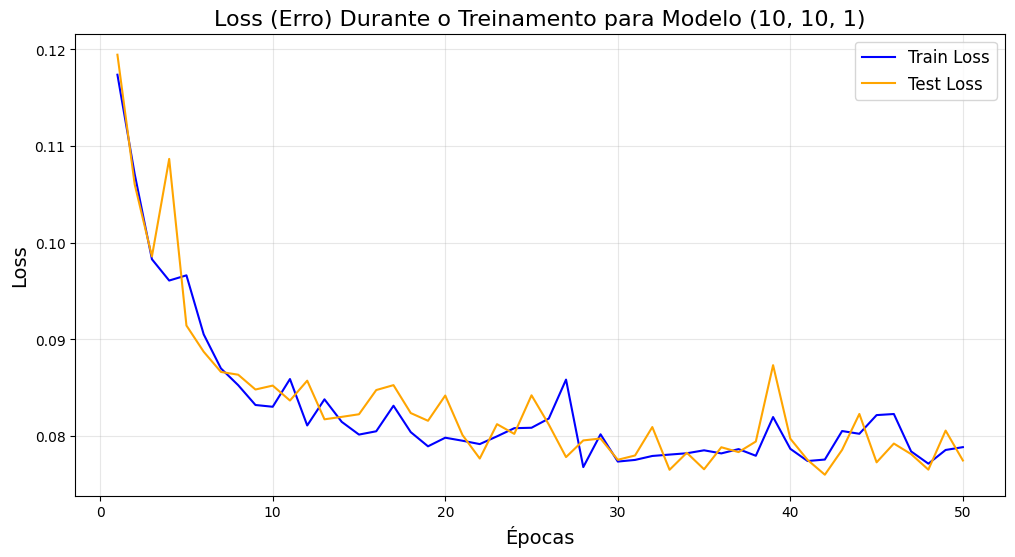

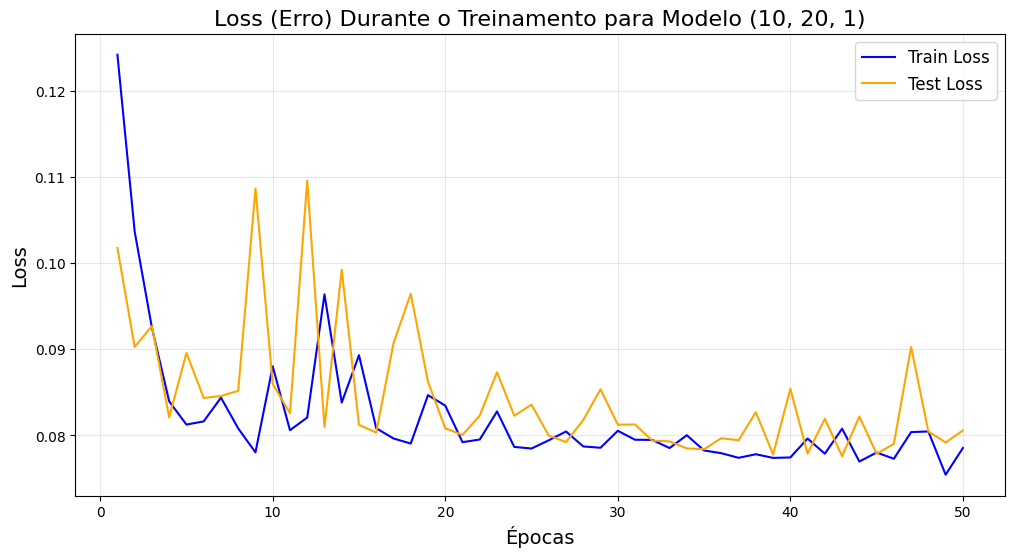

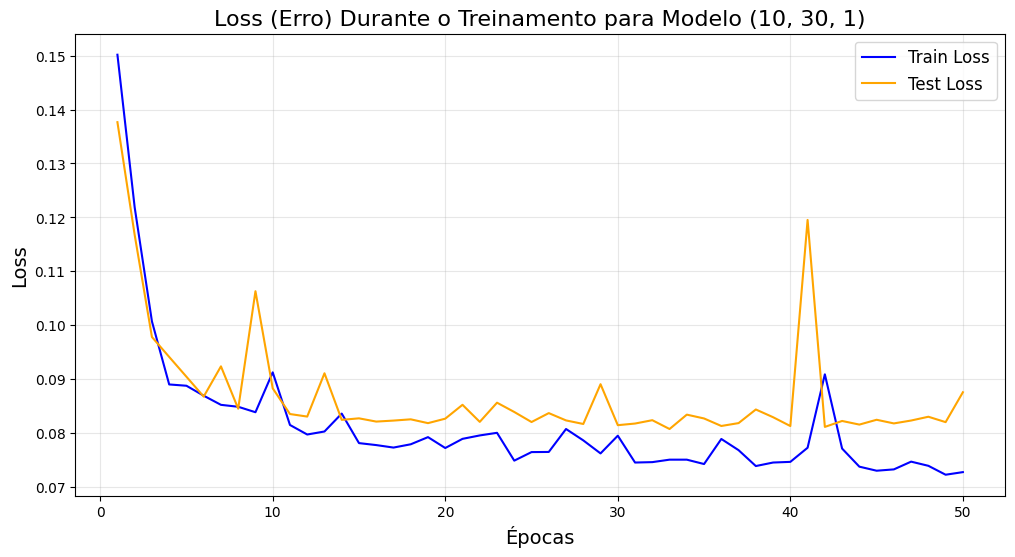

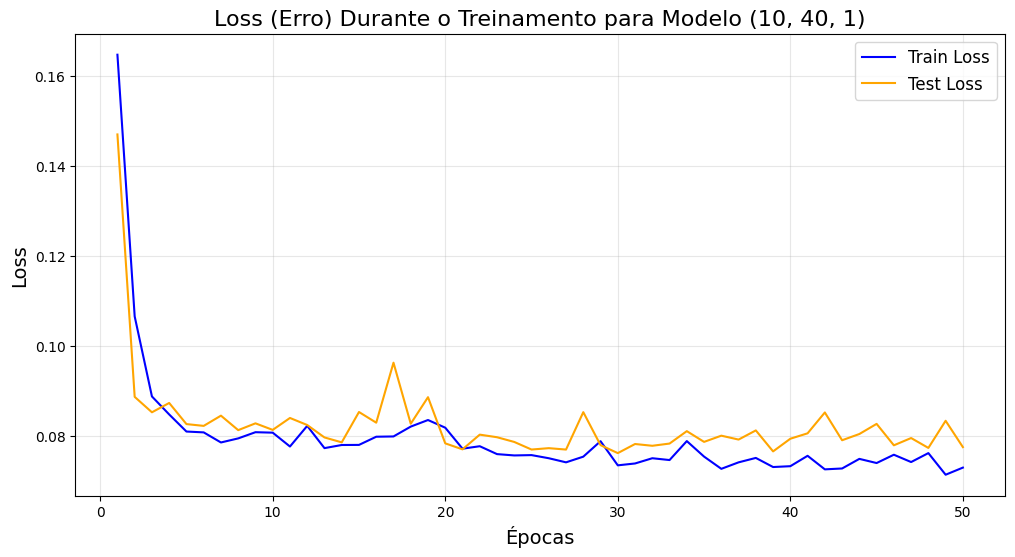

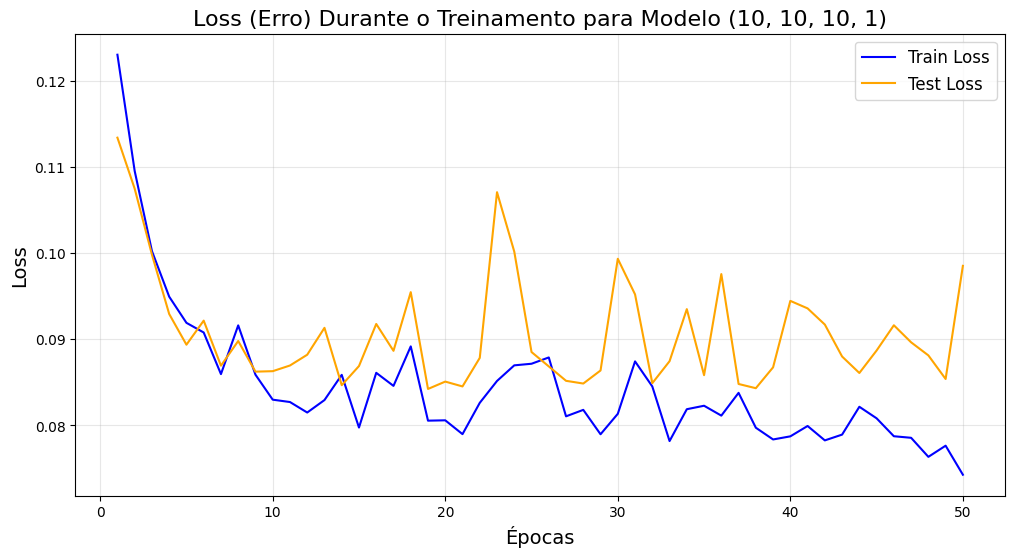

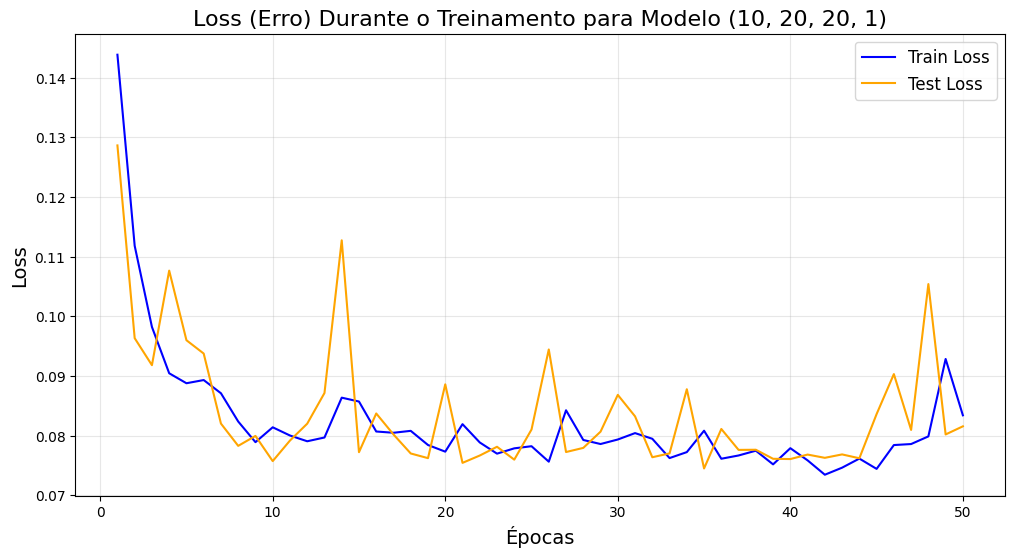

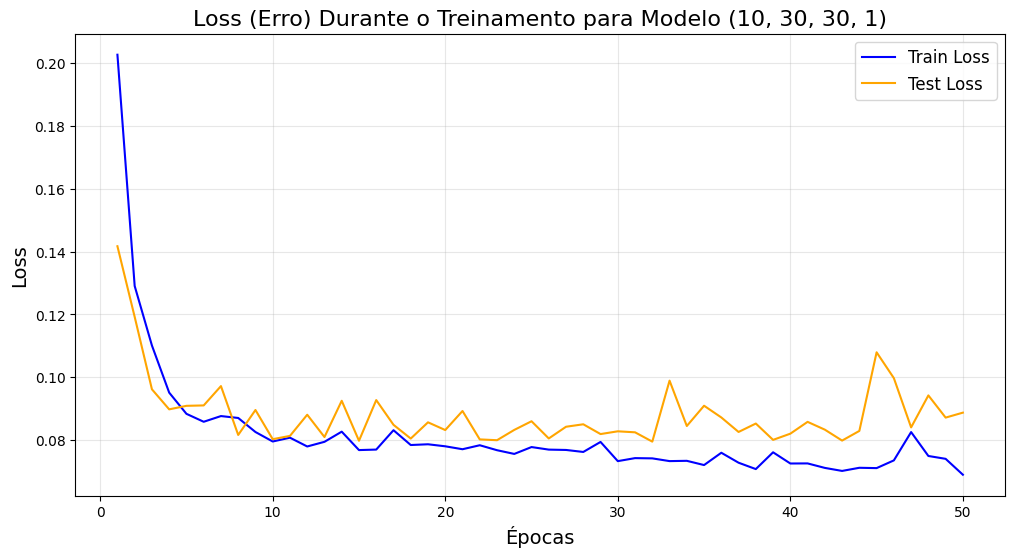

In [126]:
for config in models_config:
    mlp = MLP(*config, learning_rate=0.01, momentum=0.9)
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Plotar a loss de treino e teste para cada modelo
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 51), train_loss, label="Train Loss", color='blue')
    plt.plot(range(1, 51), test_loss, label="Test Loss", color='orange')
    plt.title(f"Loss (Erro) Durante o Treinamento para Modelo {config}", fontsize=16)
    plt.xlabel("Épocas", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

## **Modelo (10, 10, 1)**

- **Análise:**
  - A **Train Loss** e a **Test Loss** diminuem rapidamente nas primeiras épocas, indicando boa convergência inicial.
  - Ao longo das épocas, as duas curvas permanecem próximas, com pequenas oscilações na **Test Loss**.
  - A estabilidade entre as curvas sugere um bom equilíbrio entre **treinamento** e **generalização**.

- **Conclusão:**
  - O modelo (10, 10, 1) apresentou bom desempenho, com **estabilidade** e **generalização**, sem sinais claros de overfitting.

---

## **Modelo (10, 20, 1)**

- **Análise:**
  - A **Train Loss** diminui de forma consistente, enquanto a **Test Loss** apresenta **oscilações mais acentuadas**, especialmente no início do treinamento.
  - Apesar da oscilação, ambas as curvas convergem para valores semelhantes ao final das épocas.

- **Conclusão:**
  - Este modelo mostrou um leve padrão de **overfitting** nas primeiras épocas, mas recupera estabilidade posteriormente.

---

## **Modelo (10, 30, 1)**

- **Análise:**
  - A **Train Loss** é mais estável e diminui gradualmente, enquanto a **Test Loss** apresenta **oscilações pontuais**, especialmente após a época 40.
  - Apesar das oscilações, as curvas permanecem próximas, indicando um bom ajuste do modelo.

- **Conclusão:**
  - O modelo (10, 30, 1) tem um bom desempenho geral, mas as oscilações tardias na **Test Loss** sugerem um possível ajuste excessivo ao final do treinamento.

---

## **Modelo (10, 40, 1)**

- **Análise:**
  - A **Train Loss** e a **Test Loss** convergem rapidamente, estabilizando em valores baixos.
  - As curvas permanecem **muito próximas**, com a **Test Loss** ligeiramente maior, mas estável.

- **Conclusão:**
  - O modelo (10, 40, 1) apresentou um **bom equilíbrio** entre treino e teste, com perdas baixas e pouca oscilação, indicando boa generalização.

---

## **Modelo (10, 10, 10, 1)**

- **Análise:**
  - A **Train Loss** diminui consistentemente, mas a **Test Loss** apresenta **oscilações mais significativas**, sugerindo **overfitting**.
  - A divergência entre as curvas nas últimas épocas é evidente.

- **Conclusão:**
  - O modelo (10, 10, 10, 1) mostrou sinais claros de **overfitting**, onde o modelo aprende bem os dados de treino, mas perde desempenho no teste.

---

## **Modelo (10, 20, 20, 1)**

- **Análise:**
  - A **Train Loss** diminui gradualmente, mas a **Test Loss** apresenta **picos esporádicos**, especialmente nas últimas épocas.
  - O comportamento sugere **instabilidade** durante o treinamento.

- **Conclusão:**
  - Este modelo sofreu com **overfitting** e instabilidade, indicando que a complexidade do modelo pode não ter sido benéfica para a generalização.

---

## **Modelo (10, 30, 30, 1)**

- **Análise:**
  - A **Train Loss** diminui continuamente, mas a **Test Loss** permanece visivelmente **acima** da Train Loss com **oscilações significativas**.
  - A divergência entre as curvas indica **overfitting severo**, onde o modelo ajusta demais os dados de treino, prejudicando a generalização.

- **Conclusão:**
  - O modelo (10, 30, 30, 1) apresenta **overfitting evidente**, com a Test Loss mais alta e instável ao longo do treinamento.

---

# Conclusão Geral

1. **Melhores Modelos**:
   - O modelo **(10, 10, 1)** apresentou o melhor equilíbrio entre **Train Loss** e **Test Loss**, com estabilidade e boa generalização.
   - O modelo **(10, 40, 1)** também se destacou, com baixas perdas e estabilidade.

2. **Overfitting**:
   - Modelos mais complexos, como **(10, 10, 10, 1)**, **(10, 20, 20, 1)** e **(10, 30, 30, 1)**, apresentaram sinais de **overfitting**, evidenciados pela divergência entre as curvas de treino e teste.

3. **Recomendação**:
   - Modelos com menos camadas ocultas, como **(10, 10, 1)** e **(10, 40, 1)**, são mais indicados para a tarefa, pois alcançam bom desempenho sem sofrer com overfitting.

---

## Fixando uma rede MLP  MLP(10, 10, 10, 1), mas com diferentes Learning Rate

### Explicação do Código

O código realiza a implementação de um modelo de rede neural para classificação binária utilizando o conjunto de dados `diabetes` do `sklearn`. A seguir, são descritas as principais etapas:

1. **Carregamento e Preparo dos Dados**:
   - O conjunto de dados `diabetes` é carregado, e as variáveis de entrada (`X`) e saída (`y`) são extraídas.
   - A variável `y` é transformada em uma classificação binária, onde os valores acima da mediana são mapeados como `1` (indicando diabetes), e os valores abaixo são mapeados como `0` (indicando ausência de diabetes).

2. **Normalização dos Dados**:
   - Os dados de entrada (`X`) são normalizados utilizando o `MinMaxScaler`, que ajusta os valores para um intervalo entre 0 e 1.

3. **Divisão dos Dados em Treinamento e Teste**:
   - O conjunto de dados é dividido em dois subconjuntos: 80% para treinamento e 20% para teste.

4. **Configuração do Modelo**:
   - Um modelo de Perceptron Multicamadas (MLP) é configurado com 3 camadas ocultas, cada uma com 10 neurônios. 
   - A configuração do modelo será testada para diferentes taxas de aprendizado (`learning_rates`), com valores de 0.1, 0.01 e 0.001.

5. **Treinamento e Avaliação do Modelo**:
   - Para cada taxa de aprendizado (`lr`), o modelo MLP é treinado por 50 épocas.
   - Durante o treinamento, o erro quadrático médio (MSE) é calculado tanto para o conjunto de treinamento quanto para o conjunto de teste a cada época, usando um batch de tamanho 32.
   - O modelo é avaliado usando várias métricas de desempenho, como `accuracy`, `balanced accuracy`, `f1 score`, `precision` e `recall`.

6. **Armazenamento dos Resultados**:
   - Os resultados de desempenho para cada taxa de aprendizado são armazenados em uma lista, contendo as métricas calculadas para cada modelo treinado.

Essas etapas permitem comparar como diferentes taxas de aprendizado afetam o desempenho do modelo na tarefa de classificação binária.


In [127]:
# Carregar o dataset diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
y = np.where(y > np.median(y), 1, 0)  # Transformando em classificação binária: 1 = diabetes, 0 = não

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Configurações de modelos com 10 neurônios em cada camada oculta
models_config = [(10, 10, 10, 1)]  # MLP com 3 camadas (10, 10, 10)

# Resultados para diferentes learning rates
learning_rates = [0.1, 0.01, 0.001]
results_lr = []

# Testar os modelos com diferentes learning rates
for lr in learning_rates:
    mlp = MLP(10, 10, 10, 1, learning_rate=lr, momentum=0.9)  # Criar MLP com a configuração
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Avaliar o modelo
    predictions, accuracy, balanced_accuracy, f1, precision, recall = mlp.test_model(X_test, y_test)

    # Armazenar os resultados
    results_lr.append({
        'Learning Rate': lr,
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

/opt/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Explicação do Código

Este código tem como objetivo converter os resultados obtidos durante o treinamento do modelo para um formato de tabela e destacar as melhores métricas para facilitar a análise.

1. **Conversão dos Resultados para um DataFrame**:
   - Os resultados das métricas de desempenho (`accuracy`, `balanced accuracy`, `f1 score`, `precision`, `recall`) são convertidos em um DataFrame do `pandas`, facilitando a visualização e análise das informações.

2. **Função para Destacar o Melhor Valor de Cada Métrica**:
   - A função `highlight_best` é definida para destacar o melhor valor de cada métrica. 
   - Para a maioria das métricas, o valor máximo é considerado o melhor, mas para `MSE` (Mean Squared Error) e `MAE` (Mean Absolute Error), o melhor valor é o mínimo, pois estes são erros e valores menores indicam melhor desempenho.
   - A função aplica um fundo vermelho ao melhor valor em cada coluna, facilitando a identificação visual.

3. **Exibição da Tabela com os Resultados Destacados**:
   - A tabela com os resultados é estilizada utilizando o método `.style.apply()` para aplicar a função `highlight_best` em cada coluna.
   - O resultado é exibido utilizando `IPython.display`, permitindo que a tabela formatada seja mostrada diretamente no notebook.

Essa abordagem ajuda a identificar rapidamente os melhores modelos com base nas métricas calculadas, destacando visualmente os melhores desempenhos.


In [128]:
# Converter os resultados para um DataFrame
df_results_lr = pd.DataFrame(results_lr)

# Função para destacar o melhor valor de cada métrica
def highlight_best(x):
    df = x.copy()
    for col in df.columns:
        max_value = df[col].max() if col not in ['MSE', 'MAE'] else df[col].min()  # Mínimo para MSE, MAE
        df[col] = df[col].apply(lambda val: 'background-color: red' if val == max_value else '')
    return df

# Exibir a tabela com os resultados destacados
styled_results_lr = df_results_lr.style.apply(highlight_best, axis=None)
import IPython.display as display
display.display(styled_results_lr)

,Learning Rate,Accuracy,Balanced Accuracy,F1 Score,Precision,Recall
0,0.100000,0.550562,0.500000,0.000000,0.000000,0.000000
1,0.010000,0.797753,0.804847,0.795455,0.729167,0.875000
2,0.001000,0.752809,0.752551,0.731707,0.714286,0.750000


## Análise dos Resultados

### 1. **Learning Rate = 0.1**
- **Desempenho:**
  - A **Accuracy** é **0.550562**, com **Balanced Accuracy = 0.5**.
  - O **F1 Score**, **Precision** e **Recall** são todos **0.0**, indicando que o modelo **não conseguiu aprender** e não fez previsões corretas.
- **Causa Provável:**
  - O **Learning Rate alto (0.1)** resultou em **instabilidade durante o treinamento**, impedindo o modelo de convergir adequadamente.
- **Conclusão:**
  - **Taxas de aprendizado altas** prejudicam o ajuste do modelo, tornando o aprendizado ineficaz.

---

### 2. **Learning Rate = 0.01**
- **Desempenho:**
  - Este foi o **melhor resultado geral**:
    - **Accuracy = 0.797753**
    - **Balanced Accuracy = 0.804847**
    - **F1 Score = 0.795455**
    - **Precision = 0.729167**
    - **Recall = 0.875000**
  - O alto valor de **Recall** sugere que o modelo conseguiu identificar corretamente a maioria dos exemplos positivos, com boa **Precision** e **F1 Score**.
- **Conclusão:**
  - **Learning Rate = 0.01** apresentou o melhor equilíbrio entre **convergência** e **generalização**, resultando no melhor desempenho entre os valores testados.

---

### 3. **Learning Rate = 0.001**
- **Desempenho:**
  - **Accuracy = 0.752809** e **Balanced Accuracy = 0.752551**, indicando um desempenho razoável.
  - O **F1 Score = 0.731707** e **Recall = 0.750000**, sugerem que o modelo tem uma boa capacidade de identificar exemplos positivos.
  - A **Precision = 0.714286** é ligeiramente menor, indicando algumas classificações positivas incorretas (falsos positivos).
- **Conclusão:**
  - Com **Learning Rate = 0.001**, o modelo convergiu de forma estável, mas não obteve o mesmo desempenho observado com **LR = 0.01**.

---

## Conclusão Geral

- **Learning Rate = 0.01** apresentou o **melhor desempenho geral**, com a maior **Accuracy**, **Balanced Accuracy**, **F1 Score** e **Recall**, além de boa **Precision**. Esse valor proporcionou uma convergência adequada e um excelente ajuste do modelo.
- **Learning Rate = 0.1** resultou em **falha no aprendizado**, devido à alta taxa de atualização dos pesos, levando a um modelo incapaz de prever corretamente.
- **Learning Rate = 0.001** teve um desempenho aceitável, mas não tão competitivo quanto **LR = 0.01**.

### **Recomendação Final:**
Utilizar o **Learning Rate = 0.01** para obter o melhor desempenho no treinamento da rede MLP fixa.

---

### Explicação do Código

Este código tem como objetivo plotar a evolução da loss de treinamento e teste durante o treinamento do modelo de rede neural para diferentes taxas de aprendizado (`learning_rate`).

1. **Loop para Testar Diferentes Taxas de Aprendizado**:
   - O código executa um loop para testar três diferentes taxas de aprendizado (armazenadas na lista `learning_rates`).
   - Para cada taxa de aprendizado (`lr`), é configurado e treinado um modelo de Perceptron Multicamadas (MLP) com 3 camadas ocultas, cada uma com 10 neurônios.

2. **Cálculo da Loss de Treinamento e Teste**:
   - Durante o treinamento, o erro quadrático médio (MSE) é calculado tanto para o conjunto de treinamento quanto para o conjunto de teste a cada época, usando um batch de tamanho 32.
   - A loss de treinamento e teste é armazenada nas listas `train_loss` e `test_loss`, respectivamente.

3. **Plotagem da Loss**:
   - Após o treinamento, a evolução da loss de treinamento (`train_loss`) e de teste (`test_loss`) ao longo das 50 épocas é plotada em um gráfico.
   - O gráfico é configurado com título, rótulos para os eixos, e uma legenda para distinguir as curvas de treinamento e teste.
   - A cor azul é usada para a curva de `Train Loss`, e a cor laranja para a curva de `Test Loss`.
   - O gráfico é exibido utilizando o `matplotlib`, com a visualização dos resultados de cada taxa de aprendizado.

Esse processo permite observar o comportamento da perda do modelo em função das épocas e como ela varia conforme a taxa de aprendizado, facilitando a análise de desempenho do modelo para diferentes configurações.


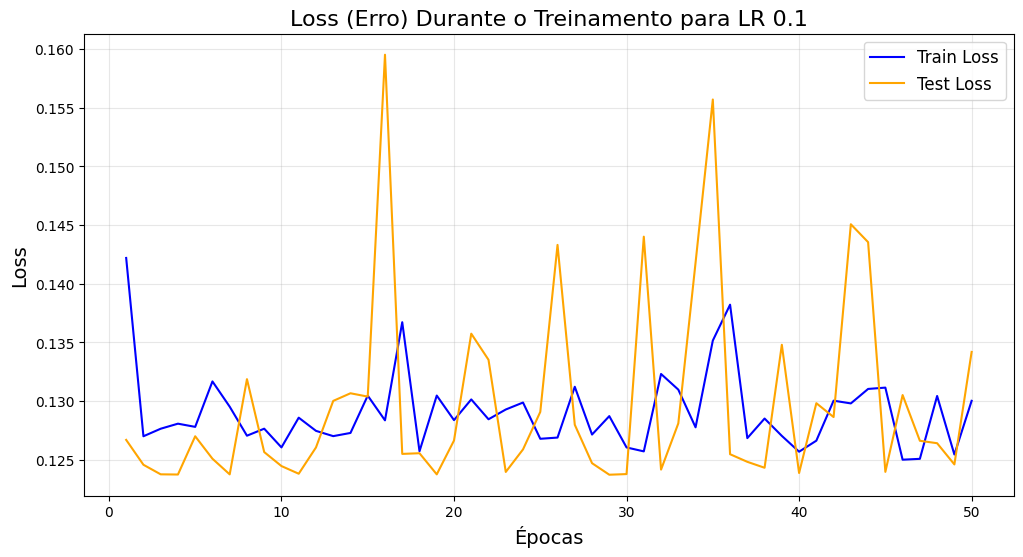

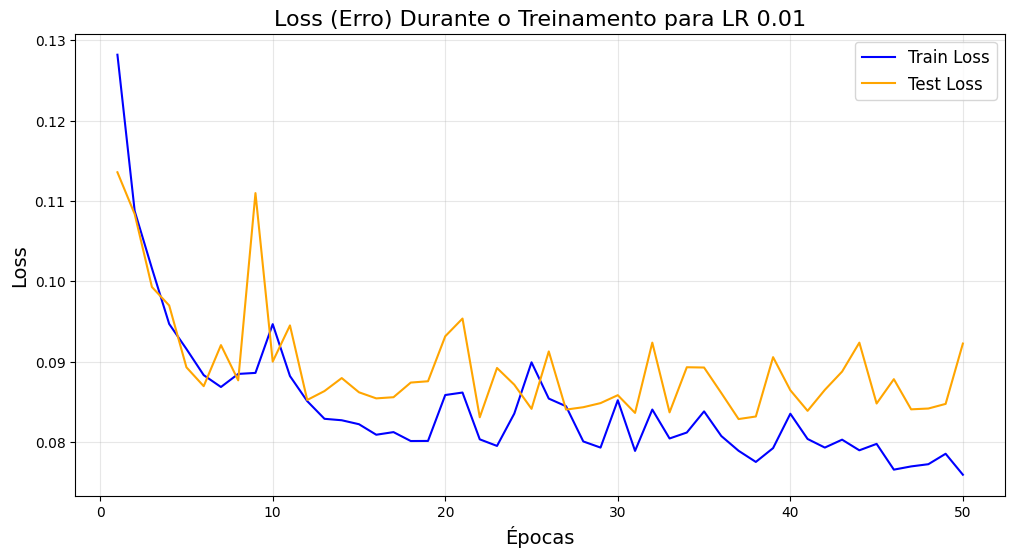

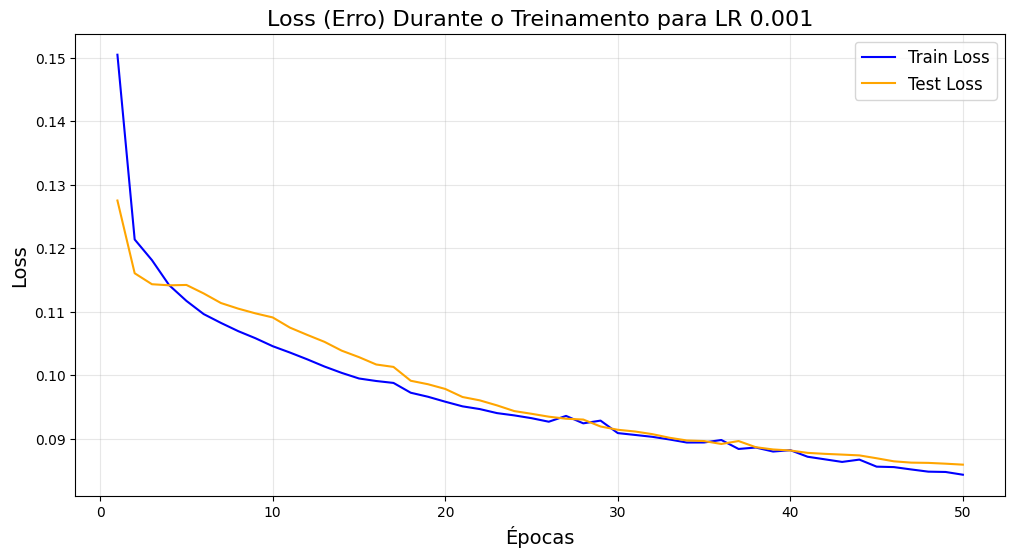

In [129]:
# Plotar a Loss de Treinamento e Teste para cada Learning Rate
for idx, lr in enumerate(learning_rates):
    mlp = MLP(10, 10, 10, 1, learning_rate=lr, momentum=0.9)
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Plotar a loss de treino e teste para cada modelo
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 51), train_loss, label="Train Loss", color='blue')
    plt.plot(range(1, 51), test_loss, label="Test Loss", color='orange')
    plt.title(f"Loss (Erro) Durante o Treinamento para LR {lr}", fontsize=16)
    plt.xlabel("Épocas", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

## **Learning Rate = 0.1**

- **Análise:**
  - A **Train Loss** e a **Test Loss** apresentam **oscilações significativas** ao longo das épocas.
  - A **Test Loss** exibe picos altos e comportamento instável, indicando que o modelo não consegue convergir de forma adequada.
  - A **Train Loss** também não diminui de forma consistente, sugerindo dificuldades no aprendizado.

- **Conclusão:**
  - O **Learning Rate = 0.1** é **muito alto**, causando **instabilidade** no treinamento e impedindo a convergência do modelo.
  - O modelo não generaliza bem e apresenta comportamento errático.

---

## **Learning Rate = 0.01**

- **Análise:**
  - A **Train Loss** diminui de forma consistente ao longo das épocas, enquanto a **Test Loss** também apresenta um padrão decrescente.
  - No entanto, existem **oscilações** na **Test Loss**, especialmente entre as épocas **10** e **30**, indicando uma leve instabilidade na generalização.
  - As duas curvas permanecem próximas, sugerindo que o modelo consegue generalizar razoavelmente bem, apesar das flutuações.

- **Conclusão:**
  - O **Learning Rate = 0.01** proporcionou um **treinamento estável** e boa **convergência**, com pequenas oscilações na Test Loss.
  - Esse valor foi o **mais eficiente** em termos de equilíbrio entre aprendizado e generalização.

---

## **Learning Rate = 0.001**

- **Análise:**
  - A **Train Loss** e a **Test Loss** diminuem de forma **suave e constante** ao longo das épocas.
  - As duas curvas se mantêm **muito próximas**, sem grandes oscilações, indicando **estabilidade** durante o treinamento.
  - A convergência ocorre de forma mais lenta, mas o modelo apresenta uma excelente **generalização**, com Test Loss quase idêntica à Train Loss.

- **Conclusão:**
  - O **Learning Rate = 0.001** resultou em um treinamento **muito estável** e com boa generalização.
  - No entanto, a velocidade de convergência foi mais lenta, o que pode ser uma desvantagem em cenários que exigem treinamento rápido.


---

## Conclusão Final

- O **Learning Rate = 0.01** apresentou o melhor equilíbrio entre **velocidade de convergência**, **estabilidade** e **generalização**, tornando-o o mais adequado para o treinamento deste modelo.
- O **Learning Rate = 0.001** apresentou **generalização excelente**, mas com convergência mais lenta.
- O **Learning Rate = 0.1** foi **inadequado**, resultando em treinamento instável e ineficaz.

---

## Fixando uma rede MLP  MLP(10, 10, 10, 1) fixando a Learning Rate (0.1), mas com diferentes momentos

### Explicação do Código

Este código tem como objetivo testar diferentes valores de momentum, mantendo a taxa de aprendizado (`learning_rate`) fixa em 0.1, para avaliar o impacto desse parâmetro no desempenho do modelo de rede neural.

1. **Configuração dos Valores de Momentum**:
   - O código testa diferentes valores de momentum, armazenados na lista `momentums` (0.9, 0.7, 0.5, 0.3, 0.01). O momentum é um parâmetro que ajuda a acelerar o treinamento, mantendo a direção do gradiente anterior para ajustar o peso de forma mais eficiente.

2. **Treinamento do Modelo para Cada Valor de Momentum**:
   - Para cada valor de momentum, um modelo de Perceptron Multicamadas (MLP) com 3 camadas ocultas de 10 neurônios cada é configurado, e o modelo é treinado por 50 épocas.
   - O erro quadrático médio (MSE) é calculado a cada época tanto para o conjunto de treinamento quanto para o conjunto de teste, com o uso de batches de tamanho 32.

3. **Avaliação do Modelo**:
   - Após o treinamento, o modelo é avaliado utilizando várias métricas de desempenho, como `accuracy`, `balanced accuracy`, `f1 score`, `precision`, e `recall`, para cada valor de momentum.
   
4. **Armazenamento dos Resultados**:
   - Os resultados para cada valor de momentum (incluindo as métricas calculadas) são armazenados na lista `results_momentum`.

Esse processo permite comparar o desempenho do modelo para diferentes valores de momentum e avaliar como esse parâmetro afeta a precisão e outras métricas de desempenho do modelo.


In [130]:
# Testar diferentes valores de momentum com Learning Rate fixo em 0.1
momentums = [0.9, 0.7, 0.5, 0.3, 0.1]
results_momentum = []

for momentum in momentums:
    mlp = MLP(10, 10, 10, 1, learning_rate=0.1, momentum=momentum)
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Avaliar o modelo
    predictions, accuracy, balanced_accuracy, f1, precision, recall = mlp.test_model(X_test, y_test)

    # Armazenar os resultados
    results_momentum.append({
        'Momentum': momentum,
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

/opt/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Explicação do Código

Este código tem como objetivo plotar as métricas de desempenho (como `Accuracy`, `Balanced Accuracy`, `F1 Score`, `Precision`, e `Recall`) conforme os diferentes valores de momentum são testados, permitindo a análise do impacto do momentum no desempenho do modelo.

1. **Definição das Métricas**:
   - A lista `metrics` contém as métricas de desempenho a serem analisadas: `Accuracy`, `Balanced Accuracy`, `F1 Score`, `Precision` e `Recall`.

2. **Loop para Plotagem das Métricas**:
   - O código realiza um loop para cada métrica da lista `metrics`.
   - Para cada métrica, é gerado um gráfico com o valor do momentum no eixo X e o valor da métrica correspondente no eixo Y. Os valores das métricas são extraídos da lista `results_momentum`, onde cada elemento contém os resultados para um valor específico de momentum.

3. **Configuração e Exibição dos Gráficos**:
   - Para cada métrica, é criada uma figura com o tamanho 12x6, a linha correspondente à métrica é plotada com marcadores circulares (`marker='o'`), e o gráfico é personalizado com título, rótulos para os eixos e uma grade.
   - O gráfico é exibido utilizando `plt.show()`.

Esses gráficos permitem visualizar como cada métrica de desempenho varia à medida que o valor do momentum muda, facilitando a identificação do impacto do momentum nas diferentes métricas.


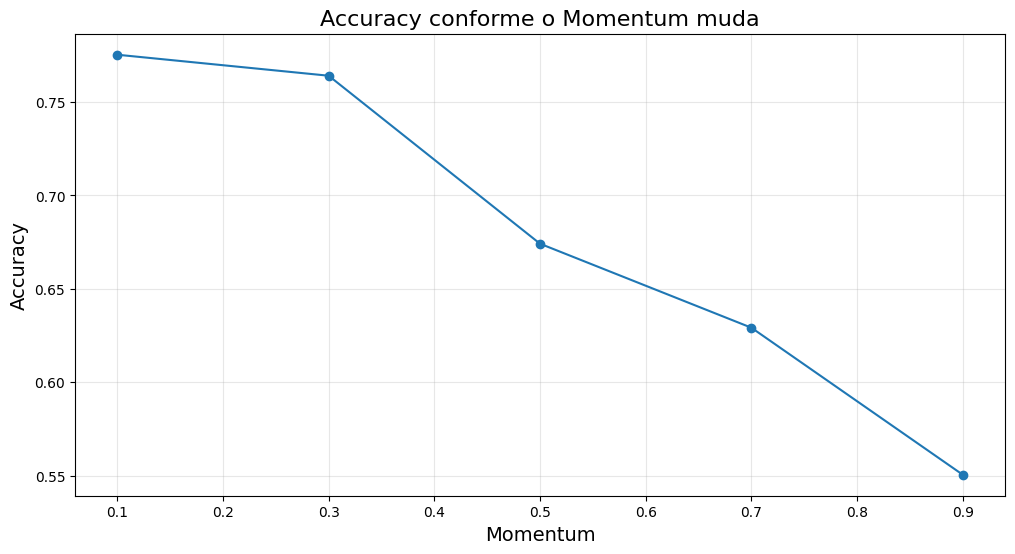

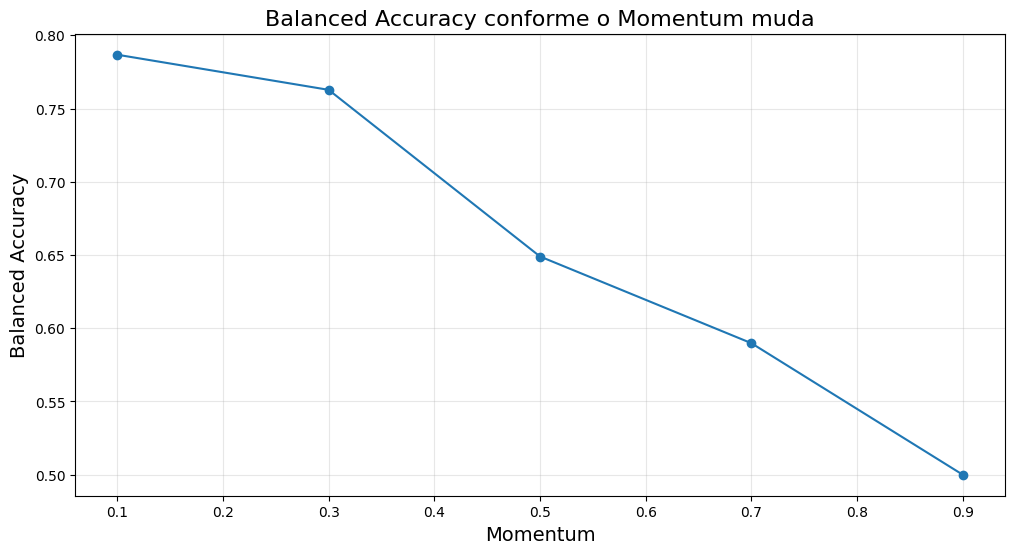

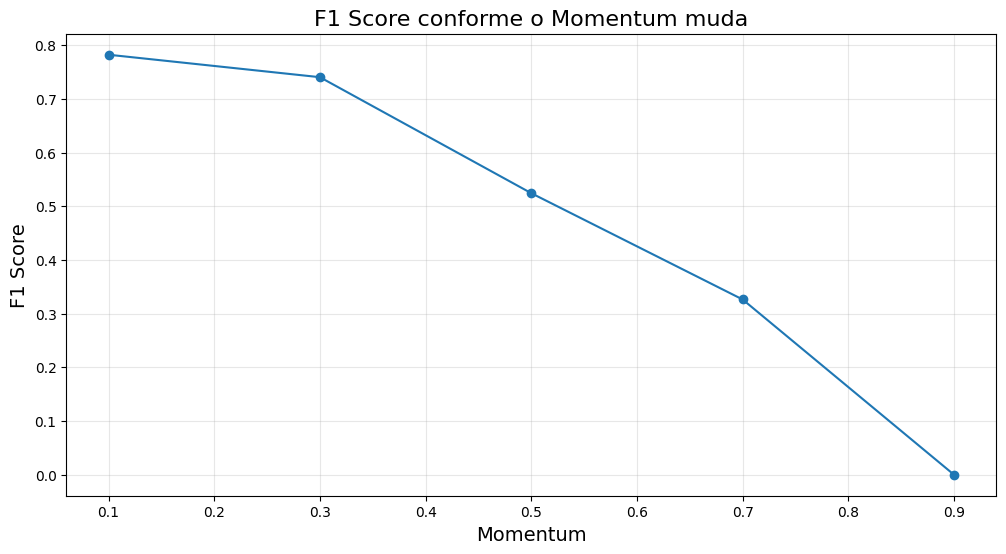

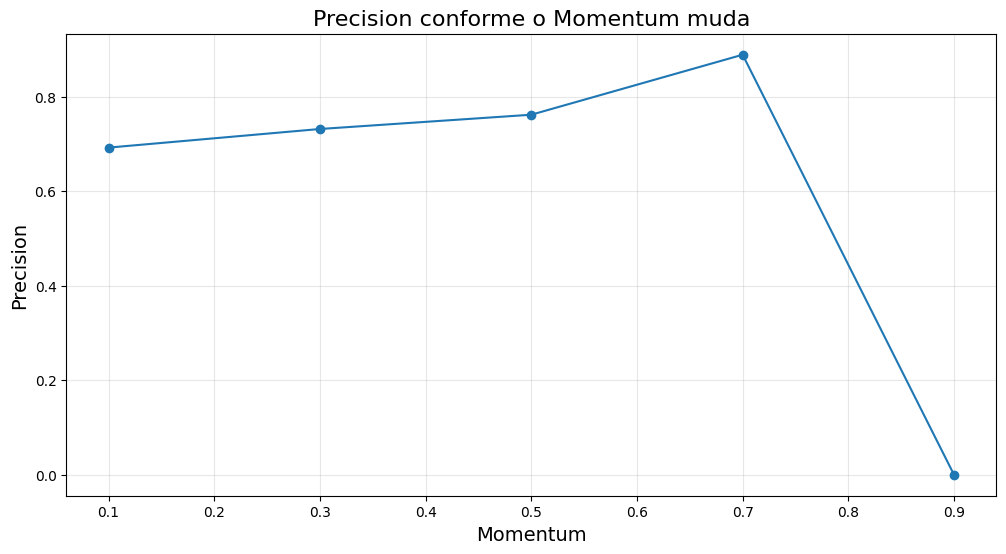

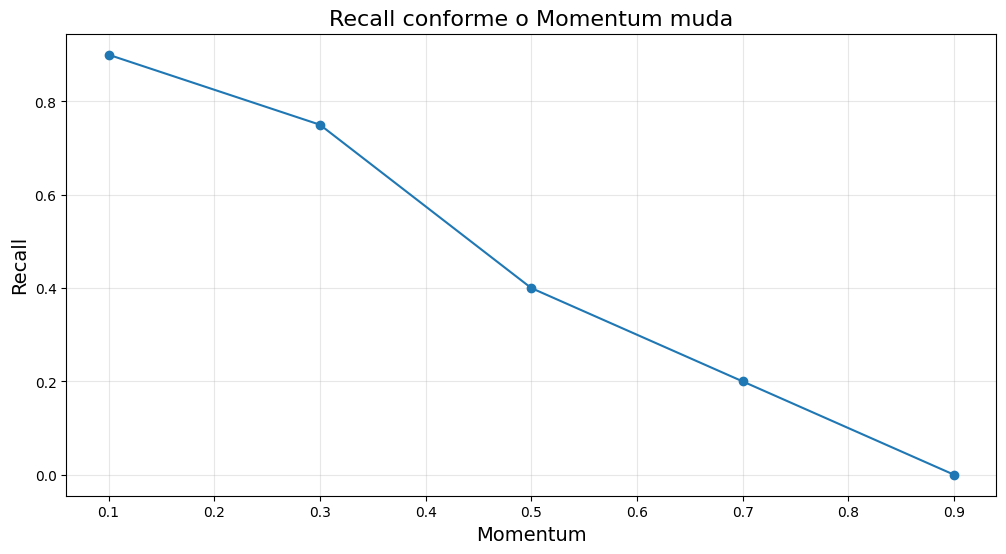

In [131]:
# Plotar as métricas de performance (Accuracy, Balanced Accuracy, F1 Score, Precision, Recall) conforme o momento diminui
metrics = ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Precision', 'Recall']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.plot(momentums, [result[metric] for result in results_momentum], marker='o')
    plt.title(f"{metric} conforme o Momentum muda", fontsize=16)
    plt.xlabel("Momentum", fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

## 1. **Análise Geral das Métricas**

Os gráficos evidenciam que **valores menores de momentum (0.1 e 0.3)** resultaram em **melhores métricas globais**, enquanto **momentum altos (0.7 e 0.9)** apresentaram uma **queda expressiva** no desempenho.

### Principais Tendências Observadas:
- **Accuracy**:
  - O melhor desempenho ocorre em **momentum = 0.1**, com **aproximadamente 76%** de acurácia.
  - Conforme o momentum aumenta, a acurácia cai gradativamente, chegando a **55%** em **momentum = 0.9**.

- **Balanced Accuracy**:
  - Segue a mesma tendência da Accuracy:
    - Melhor valor em **momentum = 0.1** (~78%).
    - Pior desempenho em **momentum = 0.9** (~50%).

- **F1 Score**:
  - **Momentum = 0.1** apresentou o melhor resultado (**~0.78**).
  - Valores intermediários (0.3 e 0.5) mostram uma queda gradual.
  - Com **momentum = 0.9**, o F1 Score despenca para **0.0**, indicando falha no aprendizado do modelo.

- **Precision**:
  - Apresenta comportamento diferente das outras métricas:
    - Cresce até **momentum = 0.7**, atingindo o pico (~85%).
    - Cai drasticamente em **momentum = 0.9**, chegando a **0.0**.

- **Recall**:
  - O **Recall** é consistentemente melhor em **momentum = 0.1** (~87%).
  - Conforme o momentum aumenta, o Recall despenca, chegando a **0.0** em **momentum = 0.9**.

---

## 2. **Análise das Perdas (Loss) Durante o Treinamento**

### Observações Principais:
- **Momentum = 0.1**:
  - A perda (Loss) apresenta **redução constante e estável**, tanto no treinamento quanto no teste.
  - As curvas de **Train Loss** e **Test Loss** são próximas e convergem bem.

- **Momentum = 0.3**:
  - A Loss apresenta **oscilações moderadas**, mas o modelo ainda converge adequadamente.

- **Momentum = 0.5**:
  - A Loss apresenta maior **oscilação** e certa dificuldade de convergência, indicando um leve impacto no treinamento.

- **Momentum = 0.7 e 0.9**:
  - Em **momentum = 0.7**, há **flutuações significativas** na Loss, sem uma convergência clara.
  - Com **momentum = 0.9**, as perdas se tornam instáveis, com a **Train Loss** e **Test Loss** permanecendo elevadas e distantes. Isso indica **falha no aprendizado do modelo**.

---

## 3. **Conclusão**

- **Momentum = 0.1** apresentou os **melhores resultados gerais** para todas as métricas, com boa estabilidade e convergência da Loss.
- Conforme o **momentum aumenta**, especialmente em **0.7 e 0.9**, o modelo perde a capacidade de aprendizado, refletido em quedas abruptas em Accuracy, Recall e F1 Score.
- Recomenda-se manter **momentum baixo (próximo a 0.1)** para o modelo MLP fixado com **LR = 0.001**, pois oferece melhor desempenho e estabilidade.

---

### Explicação do Código

Este código tem como objetivo plotar a evolução da loss de treinamento e teste durante o treinamento do modelo de rede neural, para diferentes valores de momentum.

1. **Loop para Testar Diferentes Valores de Momentum**:
   - O código executa um loop para testar os valores de momentum armazenados na lista `momentums` (0.9, 0.7, 0.5, 0.3, 0.01).
   - Para cada valor de momentum, é configurado um modelo de Perceptron Multicamadas (MLP) com 3 camadas ocultas de 10 neurônios cada, e o modelo é treinado por 50 épocas com uma taxa de aprendizado fixa de 0.1.

2. **Cálculo da Loss de Treinamento e Teste**:
   - Durante o treinamento, o erro quadrático médio (MSE) é calculado tanto para o conjunto de treinamento quanto para o conjunto de teste a cada época, utilizando batches de tamanho 32.
   - As perdas de treinamento e teste são armazenadas nas listas `train_loss` e `test_loss`, respectivamente.

3. **Plotagem da Loss para Cada Valor de Momentum**:
   - Após o treinamento, a evolução da loss de treinamento (`train_loss`) e de teste (`test_loss`) ao longo das 50 épocas é plotada em um gráfico para cada valor de momentum.
   - O gráfico é configurado com título, rótulos para os eixos, e uma legenda para distinguir as curvas de treinamento e teste.
   - As cores azul e laranja são usadas para as curvas de `Train Loss` e `Test Loss`, respectivamente.
   - O gráfico é exibido utilizando `plt.show()`.

Esse processo permite observar o comportamento da perda do modelo em função das épocas para diferentes valores de momentum, ajudando a analisar como o momentum afeta a convergência do modelo durante o treinamento.


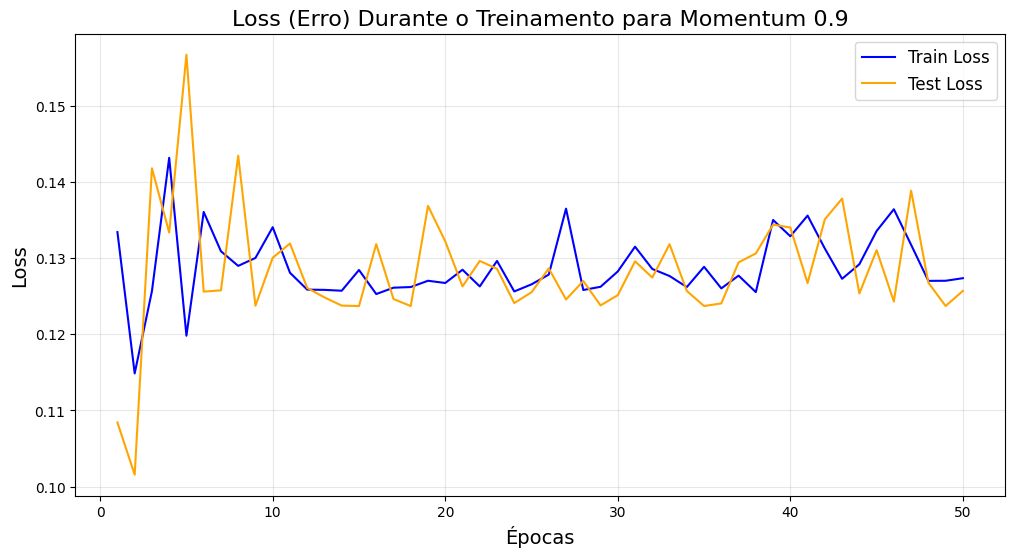

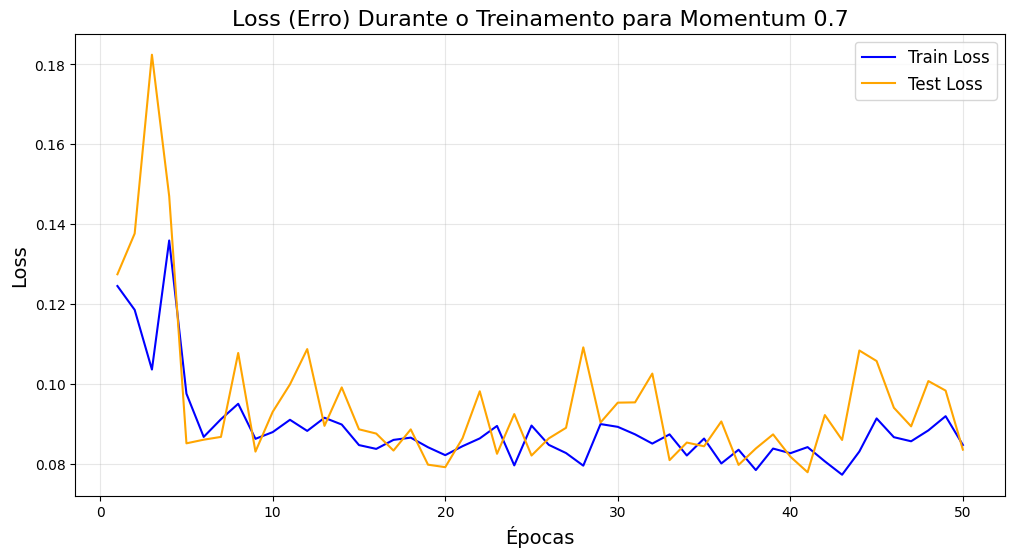

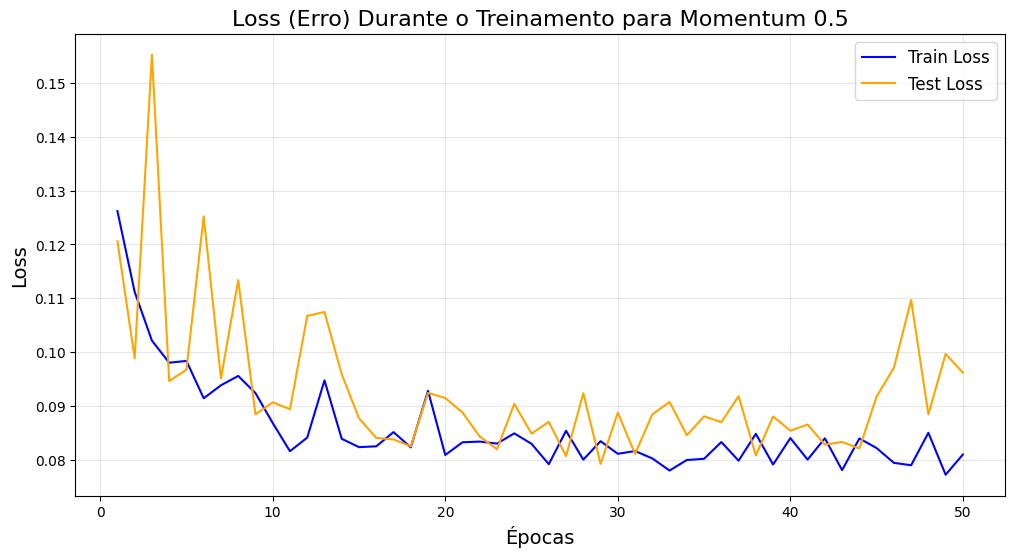

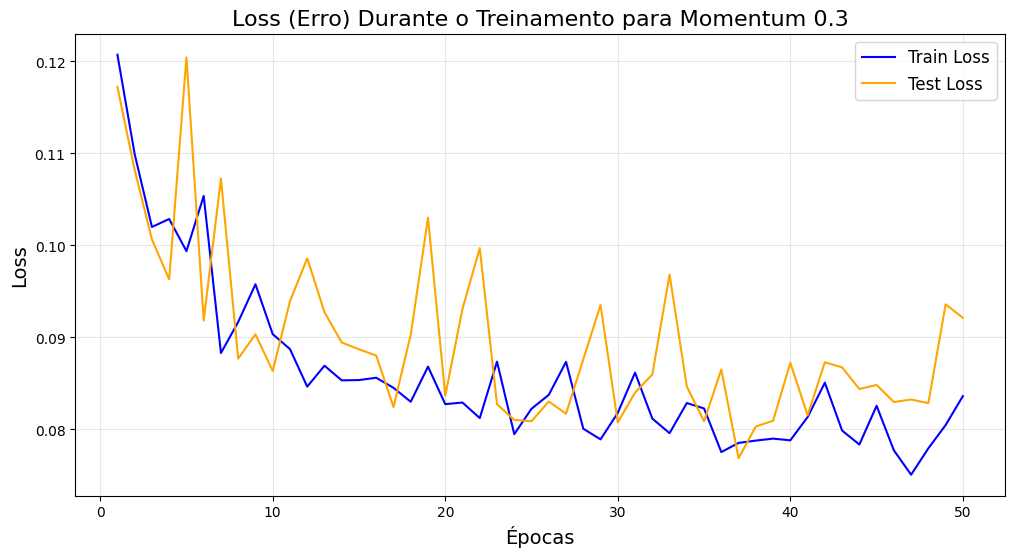

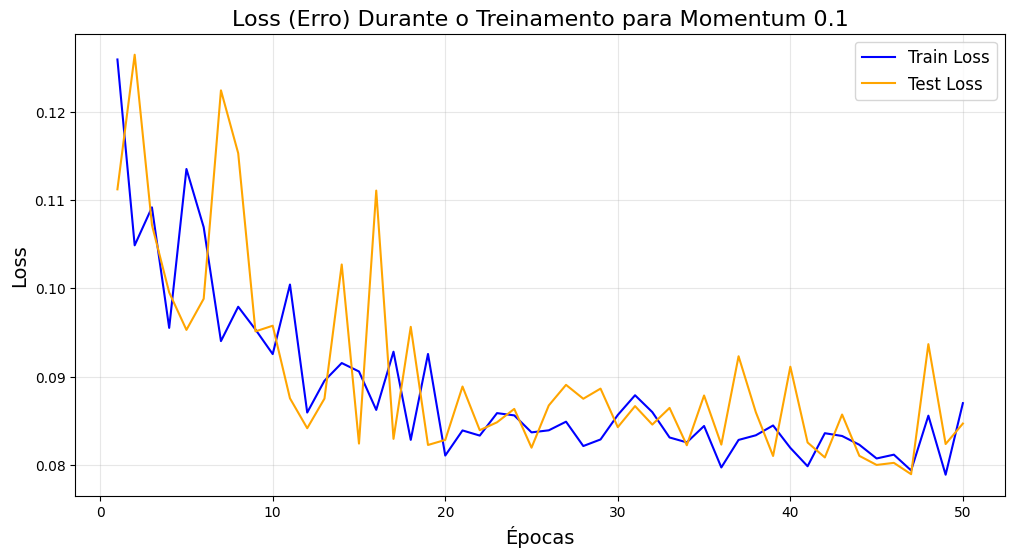

In [132]:
# Plotar a Loss de Treinamento e Teste para cada valor de Momentum
for momentum in momentums:
    mlp = MLP(10, 10, 10, 1, learning_rate=0.1, momentum=momentum)
    train_loss = []
    test_loss = []
    epochs = 50
    batch_size = 32

    for epoch in range(epochs):
        total_train_error = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_inputs = X_train[i:i + batch_size]
            batch_outputs = y_train[i:i + batch_size].reshape(-1, 1)
            mlp.forward_propagation(batch_inputs)
            mlp.backward_propagation(batch_outputs)
            total_train_error += np.sum((batch_outputs - mlp.outputs[-1]) ** 2) / 2

        avg_train_error = total_train_error / len(X_train)
        train_loss.append(avg_train_error)

        total_test_error = 0
        for i in range(0, len(X_test), batch_size):
            batch_inputs = X_test[i:i + batch_size]
            batch_outputs = y_test[i:i + batch_size].reshape(-1, 1)
            predictions = mlp.forward_propagation(batch_inputs)
            total_test_error += np.sum((batch_outputs - predictions) ** 2) / 2

        avg_test_error = total_test_error / len(X_test)
        test_loss.append(avg_test_error)

    # Plotar a loss de treino e teste para cada modelo
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 51), train_loss, label="Train Loss", color='blue')
    plt.plot(range(1, 51), test_loss, label="Test Loss", color='orange')
    plt.title(f"Loss (Erro) Durante o Treinamento para Momentum {momentum}", fontsize=16)
    plt.xlabel("Épocas", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

### **Momentum = 0.9**  
- **Comportamento da Loss**:  
  - Inicialmente, há grandes oscilações tanto na *Train Loss* quanto na *Test Loss*.  
  - A *Test Loss* apresenta picos de instabilidade, enquanto a *Train Loss* se estabiliza levemente acima de 0.13.  
- **Observação**:  
  - O alto valor de **momentum = 0.9** parece causar **ressonância excessiva**, dificultando a convergência.  
  - Há um comportamento errático ao longo do treinamento, sugerindo que o modelo está tendo dificuldade de aprendizado.

---

### **Momentum = 0.7**  
- **Comportamento da Loss**:  
  - A *Train Loss* e a *Test Loss* reduzem rapidamente no início do treinamento.  
  - No entanto, oscilações significativas persistem, especialmente na *Test Loss*, que apresenta picos recorrentes.  
  - A *Train Loss* se estabiliza em torno de **0.08**, mas a *Test Loss* mantém certa instabilidade.  
- **Observação**:  
  - Embora tenha melhorado em relação a **momentum = 0.9**, a instabilidade ainda é notável.  
  - O valor de momentum ainda pode estar alto, resultando em dificuldades na generalização.

---

### **Momentum = 0.5**  
- **Comportamento da Loss**:  
  - Ambas as perdas diminuem mais suavemente em comparação a valores de momentum maiores.  
  - A *Train Loss* converge mais rápido e se estabiliza em torno de **0.08**.  
  - A *Test Loss* apresenta pequenas oscilações, mas melhora em estabilidade ao longo das épocas.  
- **Observação**:  
  - Este valor de momentum atinge um equilíbrio melhor entre convergência e estabilidade.  
  - As oscilações, embora menores, ainda aparecem na *Test Loss*.

---

### **Momentum = 0.3**  
- **Comportamento da Loss**:  
  - As perdas apresentam uma trajetória estável de decaimento, com oscilações leves.  
  - A *Train Loss* e a *Test Loss* convergem próximas a **0.08**.  
  - O comportamento é mais estável comparado aos valores maiores de momentum.  
- **Observação**:  
  - Momentum moderado (**0.3**) reduz a instabilidade observada anteriormente.  
  - A convergência é um pouco mais lenta, mas o modelo apresenta menos variabilidade entre treinamento e teste.

---

### **Momentum = 0.1**  
- **Comportamento da Loss**:  
  - A *Train Loss* e a *Test Loss* diminuem de forma **gradual e estável**, convergindo em torno de **0.08**.  
  - As oscilações são mínimas, e a diferença entre *Train Loss* e *Test Loss* é pequena, indicando boa generalização.  
- **Observação**:  
  - Este é o valor de momentum mais estável e eficiente, apresentando **ótima convergência** e **redução de oscilações**.  
  - O treinamento é mais controlado, sem picos expressivos na *Test Loss*.  

---

### **Conclusão**  
- **Momentum Elevado (0.9 e 0.7)**:  
  - Apresenta instabilidade e dificuldade de convergência, com grandes oscilações e picos nas perdas.  
- **Momentum Moderado (0.5 e 0.3)**:  
  - Reduz oscilações, mas ainda apresenta algumas variações na *Test Loss*. A convergência é mais controlada.  
- **Momentum Baixo (0.1)**:  
  - Proporciona o **melhor comportamento** durante o treinamento, com perdas estáveis e convergência suave.  

Portanto, **Momentum = 0.1** é o valor ideal, pois garante uma **redução consistente** da loss e uma melhor generalização do modelo.

In [134]:
# Carregar o dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
y = np.where(y > np.median(y), 1, 0)  # Transformar em classificação binária: 1 = diabetes, 0 = não

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Configurações
models_config = [
    (10, 10, 1), (10, 20, 1), (10, 30, 1), (10, 40, 1), 
    (10, 10, 10, 1), (10, 20, 20, 1), (10, 30, 30, 1)
]
learning_rates = [0.1, 0.01, 0.001]
momentums = [0.9, 0.7, 0.5, 0.3, 0.1]

# Resultados
results = []

# Testar todas as combinações
for config in models_config:
    for lr in learning_rates:
        for momentum in momentums:
            mlp = MLP(*config, learning_rate=lr, momentum=momentum)
            epochs = 50
            batch_size = 32

            # Treinamento
            for epoch in range(epochs):
                indices = np.arange(len(X_train))
                np.random.shuffle(indices)
                X_train_shuffled = X_train[indices]
                y_train_shuffled = y_train[indices]

                for i in range(0, len(X_train), batch_size):
                    batch_inputs = X_train_shuffled[i:i + batch_size]
                    batch_outputs = y_train_shuffled[i:i + batch_size].reshape(-1, 1)
                    mlp.forward_propagation(batch_inputs)
                    mlp.backward_propagation(batch_outputs)

            # Testar o modelo
            predictions = mlp.forward_propagation(X_test)
            predictions_binary = np.where(predictions.flatten() > 0.5, 1, 0)  # Classificação binária

            # Calcular métricas
            accuracy = accuracy_score(y_test, predictions_binary)
            balanced_acc = balanced_accuracy_score(y_test, predictions_binary)
            f1 = f1_score(y_test, predictions_binary)
            precision = precision_score(y_test, predictions_binary)
            recall = recall_score(y_test, predictions_binary)

            # Armazenar resultados
            results.append({
                "Model": config,
                "Learning Rate": lr,
                "Momentum": momentum,
                "Accuracy": accuracy,
                "Balanced Accuracy": balanced_acc,
                "F1 Score": f1,
                "Precision": precision,
                "Recall": recall
            })

# Criar DataFrame
df_results = pd.DataFrame(results)

# Função para destacar os melhores valores por coluna
def highlight_best(df):
    # Criar um DataFrame de estilo vazio com mesmo formato
    style = pd.DataFrame('', index=df.index, columns=df.columns)

    # Destacar o máximo de cada métrica individualmente
    for col in ['Accuracy', 'Balanced Accuracy', 'F1 Score', 'Precision', 'Recall']:
        max_value = df[col].max()
        style.loc[df[col] == max_value, col] = 'background-color: red'

    return style

# Aplicar estilo corrigido
styled_df = df_results.style.apply(highlight_best, axis=None)

# Exibir tabela estilizada
import IPython.display as display
display.display(styled_df)

/opt/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Learning Rate,Momentum,Accuracy,Balanced Accuracy,F1 Score,Precision,Recall
0,"(10, 10, 1)",0.100000,0.900000,0.449438,0.500000,0.620155,0.449438,1.000000
1,"(10, 10, 1)",0.100000,0.700000,0.764045,0.771939,0.764045,0.693878,0.850000
2,"(10, 10, 1)",0.100000,0.500000,0.719101,0.708163,0.657534,0.727273,0.600000
3,"(10, 10, 1)",0.100000,0.300000,0.730337,0.720663,0.675676,0.735294,0.625000
4,"(10, 10, 1)",0.100000,0.100000,0.741573,0.737755,0.708861,0.717949,0.700000
5,"(10, 10, 1)",0.010000,0.900000,0.786517,0.794643,0.786517,0.714286,0.875000
6,"(10, 10, 1)",0.010000,0.700000,0.752809,0.752551,0.731707,0.714286,0.750000
7,"(10, 10, 1)",0.010000,0.500000,0.764045,0.765051,0.746988,0.720930,0.775000
8,"(10, 10, 1)",0.010000,0.300000,0.741573,0.740051,0.716049,0.707317,0.725000
9,"(10, 10, 1)",0.010000,0.100000,0.719101,0.719643,0.698795,0.674419,0.725000
